In [2]:
# %%
import xarray as xr
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset, num2date

# First I need to write some code just for me and sorting out a lack of corresponding files
## This code is actually saved to your downloads as SAT2_MSK-RAD_file_finder and SAT2_AUX-RAD_file_finder 

In [5]:
AUX_MET_Files=glob.glob("/pl/active/kaygroup/PREFIRE/PREFIRE_SAT2_1B-RAD_R01/*.nc")
RAD_files=glob.glob("/pl/active/kaygroup/PREFIRE/PREFIRE_SAT2_1B-RAD_R01/*.nc")
MSK_Files=glob.glob("/pl/active/kaygroup/PREFIRE/PREFIRE_SAT2_1B-RAD_R01/*.nc")
AUX_MET_Files.sort()
RAD_files.sort()
MSK_Files.sort()
print(len(AUX_MET_Files))
print(len(RAD_files))
print(len(MSK_Files))
print(AUX_MET_Files[4019])
print(RAD_files[4019])
print(MSK_Files[4019])
#Good! They're all in order!

4020
4020
4020
/pl/active/kaygroup/PREFIRE/PREFIRE_SAT2_1B-RAD_R01/PREFIRE_SAT2_1B-RAD_R01_P00_20250417060634_04947.nc
/pl/active/kaygroup/PREFIRE/PREFIRE_SAT2_1B-RAD_R01/PREFIRE_SAT2_1B-RAD_R01_P00_20250417060634_04947.nc
/pl/active/kaygroup/PREFIRE/PREFIRE_SAT2_1B-RAD_R01/PREFIRE_SAT2_1B-RAD_R01_P00_20250417060634_04947.nc


# SAT2 1B-RAD (Since Jonah's model is based on SAT2)

In [1]:
import xarray as xr
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset, num2date
#################################################################################################################################
#Notes to self:
# so the first thing is that we have to get a merged latitude and longitude variable since the atrack is stored so bizarely
# we can start this the same way we did for radiance and then we can try plotting it
    #let's take the geometry xarray dataset and rename time to see if we can merge it
# this time we are also adding in quality masks, surface types, and quality masks
#################################################################################################################################

#read in your radiance, auxiliary meteorology, and cloud mask files: 
RAD_files = glob.glob("/pl/active/kaygroup/PREFIRE/PREFIRE_SAT2_1B-RAD_R01/*.nc")
RAD_files.sort()
AUX_MET_files = glob.glob("/pl/active/kaygroup/PREFIRE/PREFIRE_SAT2_AUX-MET_R01/*.nc")
AUX_MET_files.sort()
MSK_files = glob.glob("/pl/active/kaygroup/PREFIRE/PREFIRE_SAT2_2B-MSK_R01/*.nc")
MSK_files.sort()


print('Total Number of Files: '+str(len(RAD_files)))
for i in range(0,1):
#for i in range(0,len(RAD_files)):
        file_split_list=RAD_files[i].split('/')
        file_name=file_split_list[6]
        print('Now Running: '+str(i)+'  ('+str(file_name)+')')
        rad = xr.open_dataset(RAD_files[i], group="Radiance")
        geo = xr.open_dataset(RAD_files[i], group="Geometry")
        BT = xr.open_dataset(RAD_files[i], group="BT")
        cloud_mask = xr.open_dataset(MSK_files[i], group="Msk")
        AUX_MET = xr.open_dataset(AUX_MET_files[i], group="Aux-Met")
        

        
        #change the all-sky and clear-sky array to have the surface types included
        # make a variable for all_sky_radiance
        quality_flags=rad["radiance_quality_flag"]
        rad["all_sky_radiance"] = rad["spectral_radiance"].where(quality_flags == 0) #masking the radiance for the best quality radiance observations
        # make a variable for clear_sky_radiance
        rad['clear_sky_radiance'] = rad["all_sky_radiance"].where(cloud_mask['cloud_mask'] == 0)
        # make a variable for open_ocean_radiance
        open_ocean_radiance = rad["all_sky_radiance"].where(AUX_MET['merged_surface_type_prelim'] == 1)
        # make a variable for sea_ice_radiance
        sea_ice_radiance = rad["all_sky_radiance"].where(AUX_MET['merged_surface_type_prelim'] == 2)
        # make a variable for partial_sea_ice_radiance
        partial_sea_ice_radiance = rad["all_sky_radiance"].where(AUX_MET['merged_surface_type_prelim'] == 3)
        # make a variable for permanent_land_ice_radiance
        permanent_land_ice_radiance = rad["all_sky_radiance"].where(AUX_MET['merged_surface_type_prelim'] == 4)
        # make a variable for antarctic_ice_shelf_radiance
        antarctic_ice_shelf_radiance = rad["all_sky_radiance"].where(AUX_MET['merged_surface_type_prelim'] == 5)
        # make a variable for snow_covered_land_radiance
        snow_covered_land_radiance = rad["all_sky_radiance"].where(AUX_MET['merged_surface_type_prelim'] == 6)
        # make a variable for partial_snow_covered_land_radiance
        partial_snow_covered_land_radiance = rad["all_sky_radiance"].where(AUX_MET['merged_surface_type_prelim'] == 7)
        # make a variable for snow_free_land_radiance
        snow_free_land_radiance = rad["all_sky_radiance"].where(AUX_MET['merged_surface_type_prelim'] == 8)
        # make a variable for coastal_radiance
        coastal_radiance = rad["all_sky_radiance"].where(AUX_MET['merged_surface_type_prelim'] == 9)
        # make a variable for clr_open_ocean_radiance
        clr_open_ocean_radiance = rad['clear_sky_radiance'].where(AUX_MET['merged_surface_type_prelim'] == 1)
        # make a variable for clr_sea_ice_radiance
        clr_sea_ice_radiance = rad['clear_sky_radiance'].where(AUX_MET['merged_surface_type_prelim'] == 2)
        # make a variable for clr_partial_sea_ice_radiance
        clr_partial_sea_ice_radiance = rad['clear_sky_radiance'].where(AUX_MET['merged_surface_type_prelim'] == 3)
        # make a variable for clr_permanent_land_ice_radiance
        clr_permanent_land_ice_radiance = rad['clear_sky_radiance'].where(AUX_MET['merged_surface_type_prelim'] == 4)
        # make a variable for clr_antarctic_ice_shelf_radiance
        clr_antarctic_ice_shelf_radiance = rad['clear_sky_radiance'].where(AUX_MET['merged_surface_type_prelim'] == 5)
        # make a variable for clr_snow_covered_land_radiance
        clr_snow_covered_land_radiance = rad['clear_sky_radiance'].where(AUX_MET['merged_surface_type_prelim'] == 6)
        # make a variable for clr_partial_snow_covered_land_radiance
        clr_partial_snow_covered_land_radiance = rad['clear_sky_radiance'].where(AUX_MET['merged_surface_type_prelim'] == 7)
        # make a variable for clr_snow_free_land_radiance
        clr_snow_free_land_radiance = rad['clear_sky_radiance'].where(AUX_MET['merged_surface_type_prelim'] == 8)
        # make a variable for clr_coastal_radiance
        clr_coastal_radiance = rad["clear_sky_radiance"].where(AUX_MET['merged_surface_type_prelim'] == 9)
        
        # expanding clear-sky and all-sky to have a sfc-type dimension 
        # all-sky radiance:
        all_sky_radiance = rad["all_sky_radiance"]
        sfc_type_array=np.array(["open water","sea ice","partial sea ice","permanent land ice", "Antarctic ice shelf","snow-covered land","partial snow-covered land","snow-free land","coastal"])
        all_sky_radiance = all_sky_radiance.expand_dims(dim={"sfc_type": sfc_type_array}).transpose(..., "sfc_type") # adding a surface type dimension and making sure it is in the right position
 
        #assigning the information to each element of your surface-type grouped radiances 
        all_sky_radiance=all_sky_radiance.copy()
        all_sky_radiance.loc[dict(sfc_type = "open water")]=open_ocean_radiance
        all_sky_radiance.loc[dict(sfc_type = "sea ice")]=sea_ice_radiance
        all_sky_radiance.loc[dict(sfc_type = "partial sea ice")]=partial_sea_ice_radiance
        all_sky_radiance.loc[dict(sfc_type = "permanent land ice")]=permanent_land_ice_radiance
        all_sky_radiance.loc[dict(sfc_type = "Antarctic ice shelf")]=antarctic_ice_shelf_radiance
        all_sky_radiance.loc[dict(sfc_type = "snow-covered land")]=snow_covered_land_radiance
        all_sky_radiance.loc[dict(sfc_type = "partial snow-covered land")]=partial_snow_covered_land_radiance
        all_sky_radiance.loc[dict(sfc_type = "snow-free land")]=snow_free_land_radiance
        all_sky_radiance.loc[dict(sfc_type = "coastal")]=coastal_radiance
        all_sky_radiance=all_sky_radiance.drop_vars('sfc_type') # removing the coordinate but keeping surface type as a variable
        rad['all_sky_radiance']=all_sky_radiance # assigning all the changes we made to the dataframe

        # clear-sky radiance:
        # repeat steps from all sky for clear-sky
        clear_sky_radiance = rad["clear_sky_radiance"]
        sfc_type_array=np.array(["open water","sea ice","partial sea ice","permanent land ice", "Antarctic ice shelf","snow-covered land","partial snow-covered land","snow-free land","coastal"])
        clear_sky_radiance = clear_sky_radiance.expand_dims(dim={"sfc_type": sfc_type_array}).transpose(..., "sfc_type")
        clear_sky_radiance=clear_sky_radiance.copy()
        
        clear_sky_radiance.loc[dict(sfc_type = "open water")]=clr_open_ocean_radiance
        clear_sky_radiance.loc[dict(sfc_type = "sea ice")]=clr_sea_ice_radiance
        clear_sky_radiance.loc[dict(sfc_type = "partial sea ice")]=clr_partial_sea_ice_radiance
        clear_sky_radiance.loc[dict(sfc_type = "permanent land ice")]=clr_permanent_land_ice_radiance
        clear_sky_radiance.loc[dict(sfc_type = "Antarctic ice shelf")]=clr_antarctic_ice_shelf_radiance
        clear_sky_radiance.loc[dict(sfc_type = "snow-covered land")]=clr_snow_covered_land_radiance
        clear_sky_radiance.loc[dict(sfc_type = "partial snow-covered land")]=clr_partial_snow_covered_land_radiance
        clear_sky_radiance.loc[dict(sfc_type = "snow-free land")]=clr_snow_free_land_radiance
        clear_sky_radiance.loc[dict(sfc_type = "coastal")]=clr_coastal_radiance

        clear_sky_radiance=clear_sky_radiance.drop_vars('sfc_type')
        rad['clear_sky_radiance']=clear_sky_radiance
        
        #QUALITY MASK YOUR BT VARIABLE
        rad['spectral_BT'] = BT['spectral_BT'].where(BT['BT_quality_flag'] == 0)
        
        #BIN YOUR LONS & LATS
        
        # Changing the 1° latitude to be centered at the middle of the gridcell
        latitude_1_deg=geo['latitude']
        
            # Step 0: Change latitudes at exactly 90 degrees to be 89.999999 for exclusive binning
        latitude_1_deg = latitude_1_deg.where(latitude_1_deg < 89.999999, 89.999999) #finds values where the condition is not true and replaces them
        
            # Step 1: Define bin edges from -90 to 90, step 1°
        bin_edges = np.arange(-90, 91, 1)  # 181 edges for 180 bins
        bin_centers = bin_edges[:-1] + 0.5  # Centered at -89.5 to 89.5

            # Step 2: Digitize latitudes to get bin indices (0-based)
        bin_indices = np.digitize(latitude_1_deg, bin_edges) - 1  # subtract 1 for 0-based indexing
            # Step 3: Map each latitude to its bin center
        lat_bin_center = xr.DataArray(
            bin_centers[bin_indices],
            dims=["atrack","xtrack"],
            name="lat_bin_center"
        )
            # step 4: change the values of the latitude array so we can keep all the variable information
        latitude_1_deg.data = lat_bin_center.data
        rad['latitude_1_deg'] = latitude_1_deg
        
        
        # Changing the 1° longitude to be centered at the middle of the gridcell
        longitude_1_deg=geo['longitude']
        
            # Step 0: Change longitudes at exactly 180 degrees to be 179.9999 for exclusive binning
        longitude_1_deg = longitude_1_deg.where(longitude_1_deg < 179.9999, 179.9999) #finds values where the condition is not true and replaces them
        
            # Step 1: Define bin edges and centers for 1° bins
        bin_edges = np.arange(-180, 181, 1)        # from -180 to 180 (inclusive)
        bin_centers = bin_edges[:-1] + 0.5         # centered: -179.5 to 179.5

            # Step 2: Digitize longitudes to get bin indices
        bin_indices = np.digitize(longitude_1_deg, bin_edges) - 1  # shift to 0-based indexing

        # Step 3: Assign bin center to each longitude
        lon_bin_center = xr.DataArray(
            bin_centers[bin_indices],
            dims=["atrack","xtrack"],
            name="lon_bin_center"
        )
        
        # step 4: figure out if we can just change the values of the array so we can keep all the variable informations
        longitude_1_deg.data = lon_bin_center.data
        rad['longitude_1_deg'] = longitude_1_deg

        
        #RENAME YOUR ATRACK TO CTIME
        rad['atrack'] = geo["ctime"]
        rad = rad.rename({"atrack": "time"})
               
        
        #DELETE UNESSESARY VARIABLES for storage
        del rad["detector_ID"]
        del rad["spectral_radiance"]
        del rad["observation_bitflags"]
        del rad["calibration_bitflags"]
        del rad["calibration_quality_flag"]
        del rad["observation_quality_flag"]
        del rad["detector_quality_flag"]
        del rad["detector_bitflags"]
        del rad["radiance_quality_flag"]
        
        #GET THE FILE INDEX NUMBER
            #we need to get only the index portion of the file name and attach that to a list
        temporary_split_list=RAD_files[i].split("/")
        file_index_inbeded_string=temporary_split_list[6]
        temporary_split_list=file_index_inbeded_string.split("_")
        time_index=temporary_split_list[5]
        file_index_inbeded_string=temporary_split_list[6]
        temporary_split_list=file_index_inbeded_string.split(".")
        file_index=temporary_split_list[0]
        
        #SORT BY LAT & LON
        #you can delete this later if this doesn't work
#         rad_df=rad.to_dataframe()
#         avg_variables = ["spectral_radiance_unc", "all_sky_radiance", "clear_sky_radiance", "spectral_BT", 'latitude_1_deg', 'longitude_1_deg']
#         rad_df = rad_df[avg_variables].groupby(['xtrack','sfc_type','spectral','latitude_1_deg', 'longitude_1_deg']).mean
#         print(rad_df)
        print(rad)
        print(nom)
        #FUTURE ETHAN READ ME: you can go ahead and fix the range when you are ready
        
        #SAVE THE DATASET AS A NETCDF FILE
        rad.to_netcdf("/scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_1x1deg/PREFIRE_1B-RAD_Gridded_and_Masked_"+str(time_index)+"_"+str(file_index)+".nc")
        

Total Number of Files: 4020
Now Running: 0  (PREFIRE_SAT2_1B-RAD_R01_P00_20240629211839_00537.nc)
<xarray.Dataset>
Dimensions:                (xtrack: 8, spectral: 63, time: 7192, sfc_type: 9)
Coordinates:
  * time                   (time) datetime64[ns] 2024-06-29T21:18:44.97765004...
Dimensions without coordinates: xtrack, spectral, sfc_type
Data variables:
    wavelength             (xtrack, spectral) float32 ...
    idealized_wavelength   (xtrack, spectral) float32 ...
    spectral_radiance_unc  (time, xtrack, spectral) float32 ...
    all_sky_radiance       (time, xtrack, spectral, sfc_type) float32 nan ......
    clear_sky_radiance     (time, xtrack, spectral, sfc_type) float32 nan ......
    spectral_BT            (time, xtrack, spectral) float32 nan nan ... nan nan
    latitude_1_deg         (time, xtrack) float64 -0.5 -0.5 -0.5 ... 0.5 0.5 0.5
    longitude_1_deg        (time, xtrack) float64 159.5 160.5 ... 137.5 138.5


NameError: name 'nom' is not defined

# Monthly File Sorter

In [3]:
# File sorting code for the monthly chunks
import shutil

truth_counter=0
PREFIRE_processed_files=glob.glob("/scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_1x1deg/*nc")
PREFIRE_processed_files.sort()
for i in range(len(PREFIRE_processed_files)):
    
    temporary_split_list=PREFIRE_processed_files[i].split("/") #change index to i when we loop
    file_index_inbeded_string=temporary_split_list[6]
    PREFIRE_file_name=temporary_split_list[6]
    temporary_split_list=file_index_inbeded_string.split("_")
    time_index=temporary_split_list[5]
    time_index_list=list(time_index)
    time_index_month=time_index_list[4]+time_index_list[5]
    time_index_year=time_index_list[0]+time_index_list[1]+time_index_list[2]+time_index_list[3]
    
    # move the file
    print('Now Running: '+str(i)+'  ('+str(PREFIRE_file_name)+')')
    file_destination="/scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_Monthly/"+time_index_year+"_"+time_index_month+"/"+PREFIRE_file_name
    shutil.move(PREFIRE_processed_files[i], file_destination)

Now Running: 0  (PREFIRE_1B-RAD_Gridded_and_Masked_20240629211839_00537.nc)
Now Running: 1  (PREFIRE_1B-RAD_Gridded_and_Masked_20240629225357_00538.nc)
Now Running: 2  (PREFIRE_1B-RAD_Gridded_and_Masked_20240630002914_00539.nc)
Now Running: 3  (PREFIRE_1B-RAD_Gridded_and_Masked_20240630020432_00540.nc)
Now Running: 4  (PREFIRE_1B-RAD_Gridded_and_Masked_20240630033949_00541.nc)
Now Running: 5  (PREFIRE_1B-RAD_Gridded_and_Masked_20240630051506_00542.nc)
Now Running: 6  (PREFIRE_1B-RAD_Gridded_and_Masked_20240630065024_00543.nc)
Now Running: 7  (PREFIRE_1B-RAD_Gridded_and_Masked_20240630082541_00544.nc)
Now Running: 8  (PREFIRE_1B-RAD_Gridded_and_Masked_20240630100059_00545.nc)
Now Running: 9  (PREFIRE_1B-RAD_Gridded_and_Masked_20240630113616_00546.nc)
Now Running: 10  (PREFIRE_1B-RAD_Gridded_and_Masked_20240630131133_00547.nc)
Now Running: 11  (PREFIRE_1B-RAD_Gridded_and_Masked_20240630144650_00548.nc)
Now Running: 12  (PREFIRE_1B-RAD_Gridded_and_Masked_20240630162208_00549.nc)
Now Runni

# End-Of-Month Masker

In [ ]:
# Now to process those pesky end-of-month files
#okay, so actually, we're very quickly going to see if we can do this in general before I waste time coding this
#READ ME: put the October file (02404) back in the october section because that one actually contains no november values
overlap_files=glob.glob("/scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_Monthly/End-Of-Month_Overlap_Files/*.nc")
overlap_files.sort()
index_number=9
#print(overlap_files[index_number])
ds = xr.open_dataset(overlap_files[index_number])
print(ds)
#print(nom)
#okay, there's a time coordinate! This will actually be incredibly helpful. I'm glad that I didn't delete the time coordinate
a_ds = ds.sel(time="2025-03-31")
b_ds = ds.sel(time="2025-04-01")
#GET THE FILE INDEX NUMBER
    #we need to get only the index portion of the file name and attach that to a list
temporary_split_list=overlap_files[index_number].split("/")
file_index_inbeded_string=temporary_split_list[7]
print(file_index_inbeded_string)
temporary_split_list=file_index_inbeded_string.split("_")
time_index=temporary_split_list[5]
file_index_inbeded_string=temporary_split_list[6]
temporary_split_list=file_index_inbeded_string.split(".")
file_index=temporary_split_list[0]
        #SAVE THE DATASET AS A NETCDF FILE
print(time_index)
print(file_index)
print(a_ds)
print(b_ds)
a_ds.to_netcdf("/scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_Monthly/Masked_End-Of-Month_Overlap_Files/PREFIRE_1B-RAD_Gridded_and_Masked_"+str(time_index)+"_"+str(file_index)+"_March.nc")
b_ds.to_netcdf("scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_Monthly/Masked_End-Of-Month_Overlap_Files/PREFIRE_1B-RAD_Gridded_and_Masked_"+str(time_index)+"_"+str(file_index)+"_April.nc")

# Monthly Lat/Lon Coordinate Reformatter:

In [12]:
# okay, so we need to make 2 dataframes that go through the month:
    # one with the number of observations per gridcell
    # and another with the sum of radiances per gridcell
# the way I am thinking we do this is we do a loop where we go through each granule
    # and we take a count and a sum groupby dataframe that we can divide by at the end of our loop
    # then we can save that as a dataset at the end
        # let's just make it plottable first
        # we may need to do a few odd things though to get those two large arrays in the same format as the L3 emmisivity
import xarray as xr
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset, num2date

year="2024"
month="06"

# SET PATH
#for testing, let's start with June since it has the least amount of files
monthly_processed_PREFIRE_files=glob.glob("/scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_Monthly/"+year+"_"+month+"/*.nc") # you can change this for your desired month
monthly_processed_PREFIRE_files.sort()

#LOOP THROUGH FILES
print('Total Number of Files: '+str(len(monthly_processed_PREFIRE_files)))
for i in range(0,len(monthly_processed_PREFIRE_files)):
#for i in range(0, 1): #for testing, we're going to start with only 1 file, then go to 2
    file_split_list=monthly_processed_PREFIRE_files[i].split('/')
    file_name=file_split_list[7]
    print('Now Running: '+str(i)+'  ('+str(file_name)+')')
    
    #OPEN AS XARRAY DATASET
    ds=xr.open_dataset(monthly_processed_PREFIRE_files[i])
    
    #GROUP BY LAT and LON
    df=ds.to_dataframe()
    avg_variables = ["spectral_radiance_unc", "all_sky_radiance", "clear_sky_radiance", "spectral_BT", 'latitude_1_deg', 'longitude_1_deg']
    if i==0:
        data_count_stored = df[avg_variables].groupby(['xtrack','sfc_type','spectral','latitude_1_deg', 'longitude_1_deg']).count()
        data_sum_stored = df[avg_variables].groupby(['xtrack','sfc_type','spectral','latitude_1_deg', 'longitude_1_deg']).sum()
        #quick test to make sure that count or sum isn't providing nans in a switch to xarray
#         sum_ds = data_sum_stored.to_xarray()
#         count_ds = data_count_stored.to_xarray()
#         print(nom)
        
        # turn it into a dataframe, get the sum and count, then turn it back into an xarray dataset with two variables (all and clear), save until the next step, repeat but add to prexisting darrays
    if i>0:
        data_count = df[avg_variables].groupby(['xtrack','sfc_type','spectral','latitude_1_deg', 'longitude_1_deg']).count()
        data_sum = df[avg_variables].groupby(['xtrack','sfc_type','spectral','latitude_1_deg', 'longitude_1_deg']).sum()
        
        #if this test works, this may be the actual culprit for turning everything into nans
        #OH MY GOD, it is! alright, so we need to find a way to add these together while perserving the nan values
        #or we don't need to keep the nans because they will naturally be put back by the 0/0 operation at the end
        #data_count_stored = data_count + data_count_stored
        #data_sum_stored =  data_sum + data_sum_stored
        
        data_count_stored = data_count.add(data_count_stored, fill_value=0)
        data_sum_stored = data_sum.add(data_sum_stored, fill_value=0)
        #list of the count to and the sum over time to make sure they are working

# divide the sum arrays by the count arrays
data_sum_stored=data_sum_stored/data_count_stored #we'll rename this later

# save as an xarray dataset
print("We made it through without breaking yet, yipee!")
gridded_ds = data_sum_stored.to_xarray()
data_count_stored = data_count_stored.to_xarray()

# add a wavelength and idealized wavelength array (should have the shape 8,63 for the xtrack and spectral dimension)
    # they're all identical, so I picked the first one of each month to use
wavelength=xr.open_dataset(monthly_processed_PREFIRE_files[0])["wavelength"]
idealized_wavelength=xr.open_dataset(monthly_processed_PREFIRE_files[0])["idealized_wavelength"]
gridded_ds['wavelength']=wavelength
gridded_ds['idealized_wavelength']=idealized_wavelength

# save as a NETCDF4 file
gridded_ds.to_netcdf("/scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_Monthly/Monthly_L3/Gridcell_Averaged_Files/PREFIRE_1B-RAD_Gridded_and_Masked_"+year+"_"+month+".nc")
data_count_stored.to_netcdf("/scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_Monthly/Monthly_L3/Count_Files/PREFIRE_1B-RAD_Gridded_and_Masked_Count_"+year+"_"+month+".nc")

Total Number of Files: 17
Now Running: 0  (PREFIRE_1B-RAD_Gridded_and_Masked_20240629211839_00537.nc)
Now Running: 1  (PREFIRE_1B-RAD_Gridded_and_Masked_20240629225357_00538.nc)


AttributeError: 'DataFrameGroupBy' object has no attribute 'add'

In [13]:
df = pd.DataFrame({
    'Team': ['A', 'A', 'B', 'B'],
    'Player': ['X', 'Y', 'X', 'Y'],
    'Points': [10, 15, 10, 20]
})

grouped = df.groupby(['Team', 'Player'])['Points'].sum()
print(grouped)


Team  Player
A     X         10
      Y         15
B     X         10
      Y         20
Name: Points, dtype: int64


In [2]:
df1 = pd.DataFrame({
    'A': [1, np.nan, 3, np.nan],
    'B': [np.nan, 5, 6, 7]
})

df2 = pd.DataFrame({
    'A': [4, 5, np.nan, np.nan],
    'B': [1, np.nan, 2, 7]
})

print(df1)
print(df2)
# Add treating NaNs as 0
result = df1.add(df2, fill_value=0)
print(result)
result = df2.add(df1, fill_value=0)
print(result)
#cool! that actually does exactly what I want it to, yay!

     A    B
0  1.0  NaN
1  NaN  5.0
2  3.0  6.0
3  NaN  7.0
     A    B
0  4.0  1.0
1  5.0  NaN
2  NaN  2.0
3  NaN  7.0
     A     B
0  5.0   1.0
1  5.0   5.0
2  3.0   8.0
3  NaN  14.0
     A     B
0  5.0   1.0
1  5.0   5.0
2  3.0   8.0
3  NaN  14.0


In [10]:
print(np.array([0,9,np.nan])/np.array([0,0,0]))

[nan inf nan]


/tmp/ipykernel_2918128/1720348368.py:1: RuntimeWarning: divide by zero encountered in divide
  print(np.array([0,9,np.nan])/np.array([0,0,0]))
/tmp/ipykernel_2918128/1720348368.py:1: RuntimeWarning: invalid value encountered in divide
  print(np.array([0,9,np.nan])/np.array([0,0,0]))


In [14]:
print("printing shapes: ")
print(data_count_stored['all_sky_radiance'].shape)
print(data_sum_stored['all_sky_radiance'].shape)
print(count_ds['all_sky_radiance'].shape)
print(sum_ds['all_sky_radiance'].shape)

print("printing pandas dataframe counts")
n_non_nans = data_count_stored['all_sky_radiance'].notna().sum()
print(n_non_nans)
n_non_nans = data_sum_stored['all_sky_radiance'].notna().sum()
print(n_non_nans)
n_nans = data_count_stored['all_sky_radiance'].isna().sum()
print(n_nans)
n_nans = data_sum_stored['all_sky_radiance'].isna().sum()
print(n_nans)

print("printing xarray dataset counts")
n_non_nans = count_ds['all_sky_radiance'].count()
print(n_non_nans.values)
n_non_nans = sum_ds['all_sky_radiance'].count()
print(n_non_nans.values)
n_nans = count_ds['all_sky_radiance'].isnull().sum()
print(n_nans.values)
n_nans = sum_ds['all_sky_radiance'].isnull().sum()
print(n_nans.values)

print(8*9*63*168*353)
#print(data_count_stored['all_sky_radiance'])
#print(data_sum_stored['all_sky_radiance'])
#we also need to figure out how many values are not 0s since that might be the real issue
print("Number of zeros/non-zeros: ")
n_0 = (data_count_stored['all_sky_radiance']==0).sum()
print(n_0)
n_0 = (data_sum_stored['all_sky_radiance']==0).sum()
print(n_0)
n_0 = (data_count_stored['all_sky_radiance']!=0).sum()
print(n_0)
n_0 = (data_sum_stored['all_sky_radiance']!=0).sum()
print(n_0)
print("pandas non-nans/nans after division step: ")
pandas_division=data_sum_stored/data_count_stored
n_non_nans = pandas_division['all_sky_radiance'].notna().sum()
print(n_non_nans)
n_nans = pandas_division['all_sky_radiance'].isna().sum()
print(n_nans)

print("xarray non-nans/nans after division step: ")
xarray_division=pandas_division.to_xarray()
n_non_nans = xarray_division['all_sky_radiance'].count()
print(n_non_nans.values)
n_nans = xarray_division['all_sky_radiance'].isnull().sum()
print(n_nans.values)

print("number of all sky observations")
n_non_nans = count_ds['all_sky_radiance'].sum()
print(n_non_nans.values)

printing shapes: 
(2962008,)
(2962008,)
(8, 9, 63, 168, 353)
(8, 9, 63, 168, 353)
printing pandas dataframe counts
2962008
2962008
0
0
printing xarray dataset counts
2962008
2962008
266040936
266040936
269002944
Number of zeros/non-zeros: 
2893924
2893924
68084
68084
pandas non-nans/nans after division step: 
68084
2893924
xarray non-nans/nans after division step: 
68084
268934860
number of all sky observations
846014.0


In [11]:
processed_ds=xr.open_mfdataset("/scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_Monthly/2024_06/*.nc")
gridded_count_ds=xr.open_dataset("/scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_Monthly/Monthly_L3/Count_Files/PREFIRE_1B-RAD_Gridded_and_Masked_Count_2024_06.nc")
gridded_ds=xr.open_dataset("/scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_Monthly/Monthly_L3/Gridcell_Averaged_Files/PREFIRE_1B-RAD_Gridded_and_Masked_2024_06.nc")


#print dims
print(processed_ds.dims)
print(gridded_count_ds.dims)
print(gridded_ds.dims)
#print the sum of the count to see if there is a stored observation for each timestamp
    #for the count dataset we need to get the sum of all values in the array
test=gridded_count_ds['all_sky_radiance'].sum() #True=15638584.0
print(test.values)
    #for the processed dataset we need to get the count of all non nan values as well
test_2=processed_ds['all_sky_radiance'].count()
print(test_2.values)
#xarray.testing.assertallcclosed
print("Let's also get the total sum of all radiances and see if they differ:")
test=gridded_ds['all_sky_radiance'].sum()
print(test.values)
test_2=processed_ds['all_sky_radiance'].sum()
print(test_2.values)

Frozen({'time': 126710, 'xtrack': 8, 'spectral': 63, 'sfc_type': 9})
Frozen({'xtrack': 8, 'sfc_type': 9, 'spectral': 63, 'latitude_1_deg': 168, 'longitude_1_deg': 360})
Frozen({'xtrack': 8, 'sfc_type': 9, 'spectral': 63, 'latitude_1_deg': 168, 'longitude_1_deg': 360})
15638584.0
15638584
Let's also get the total sum of all radiances and see if they differ:
3234227.657895605
42979228.0


In [10]:
xr.testing.assert_allclose(gridded_ds,processed_ds)

AssertionError: Left and right Dataset objects are not close
Differing dimensions:
    (xtrack: 8, sfc_type: 9, spectral: 63, latitude_1_deg: 168, longitude_1_deg: 360) != (time: 126710, xtrack: 8, spectral: 63, sfc_type: 9)
Coordinates only on the left object:
  * sfc_type               (sfc_type) int64 0 1 2 3 4 5 6 7 8
  * latitude_1_deg         (latitude_1_deg) float64 -83.5 -82.5 ... 82.5 83.5
  * spectral               (spectral) int64 0 1 2 3 4 5 6 ... 57 58 59 60 61 62
  * longitude_1_deg        (longitude_1_deg) float64 -179.5 -178.5 ... 179.5
  * xtrack                 (xtrack) int64 0 1 2 3 4 5 6 7
Coordinates only on the right object:
  * time                   (time) datetime64[ns] 2024-06-29T21:18:44.97765004...
Differing data variables:
L   idealized_wavelength   (xtrack, spectral) float32 1.672 2.516 ... 53.98
R   idealized_wavelength   (time, xtrack, spectral) float32 dask.array<chunksize=(7192, 8, 63), meta=np.ndarray>
L   clear_sky_radiance     (xtrack, sfc_type, spectral, latitude_1_deg, longitude_1_deg) float64 ...
R   clear_sky_radiance     (time, xtrack, spectral, sfc_type) float32 dask.array<chunksize=(7192, 8, 63, 9), meta=np.ndarray>
L   spectral_radiance_unc  (xtrack, sfc_type, spectral, latitude_1_deg, longitude_1_deg) float64 ...
R   spectral_radiance_unc  (time, xtrack, spectral) float32 dask.array<chunksize=(7192, 8, 63), meta=np.ndarray>
L   spectral_BT            (xtrack, sfc_type, spectral, latitude_1_deg, longitude_1_deg) float64 ...
R   spectral_BT            (time, xtrack, spectral) float32 dask.array<chunksize=(7192, 8, 63), meta=np.ndarray>
L   all_sky_radiance       (xtrack, sfc_type, spectral, latitude_1_deg, longitude_1_deg) float64 ...
R   all_sky_radiance       (time, xtrack, spectral, sfc_type) float32 dask.array<chunksize=(7192, 8, 63, 9), meta=np.ndarray>
L   wavelength             (xtrack, spectral) float32 nan nan ... 53.09 54.11
R   wavelength             (time, xtrack, spectral) float32 dask.array<chunksize=(7192, 8, 63), meta=np.ndarray>
Data variables only on the right object:
    longitude_1_deg        (time, xtrack) float64 dask.array<chunksize=(7192, 8), meta=np.ndarray>
    latitude_1_deg         (time, xtrack) float64 dask.array<chunksize=(7192, 8), meta=np.ndarray>

In [13]:
single_file_test=xr.open_dataset(monthly_processed_PREFIRE_files[0])
single_file_test['idealized_wavelength']

<xarray.DataArray 'idealized_wavelength' (xtrack: 8, spectral: 63)>
array([[ 1.671875,  2.515625,  3.359375, ..., 52.296875, 53.140625, 53.984375],
       [ 1.671875,  2.515625,  3.359375, ..., 52.296875, 53.140625, 53.984375],
       [ 1.671875,  2.515625,  3.359375, ..., 52.296875, 53.140625, 53.984375],
       ...,
       [ 1.671875,  2.515625,  3.359375, ..., 52.296875, 53.140625, 53.984375],
       [ 1.671875,  2.515625,  3.359375, ..., 52.296875, 53.140625, 53.984375],
       [ 1.671875,  2.515625,  3.359375, ..., 52.296875, 53.140625, 53.984375]],
      dtype=float32)
Dimensions without coordinates: xtrack, spectral
Attributes:
    units:        micron
    long_name:    idealized wavelength
    description:  center wavelength of each spectral channel, in the idealize...

In [31]:
data_count_stored['all_sky_radiance']

xtrack  sfc_type  spectral  latitude_1_deg  longitude_1_deg
0       0         0         -83.5           -154.5             0
                                            -153.5             0
                                            -152.5             0
                                            -151.5             0
                                            -150.5             0
                                                              ..
7       8         62         83.5            87.5              0
                                             88.5              0
                                             89.5              0
                                             90.5              0
                                             91.5              0
Name: all_sky_radiance, Length: 2962008, dtype: int64

In [7]:
ds=xr.open_dataset(monthly_processed_PREFIRE_files[0])
print(ds['all_sky_radiance'].count().values)
print(ds)

846014
<xarray.Dataset>
Dimensions:                (xtrack: 8, spectral: 63, time: 7192, sfc_type: 9)
Coordinates:
  * time                   (time) datetime64[ns] 2024-06-29T21:18:44.97765004...
Dimensions without coordinates: xtrack, spectral, sfc_type
Data variables:
    wavelength             (xtrack, spectral) float32 ...
    idealized_wavelength   (xtrack, spectral) float32 ...
    spectral_radiance_unc  (time, xtrack, spectral) float32 ...
    all_sky_radiance       (time, xtrack, spectral, sfc_type) float32 nan ......
    clear_sky_radiance     (time, xtrack, spectral, sfc_type) float32 ...
    spectral_BT            (time, xtrack, spectral) float32 ...
    latitude_1_deg         (time, xtrack) float64 ...
    longitude_1_deg        (time, xtrack) float64 ...


Frozen({'xtrack': 8, 'sfc_type': 9, 'spectral': 63, 'latitude_1_deg': 168, 'longitude_1_deg': 353})


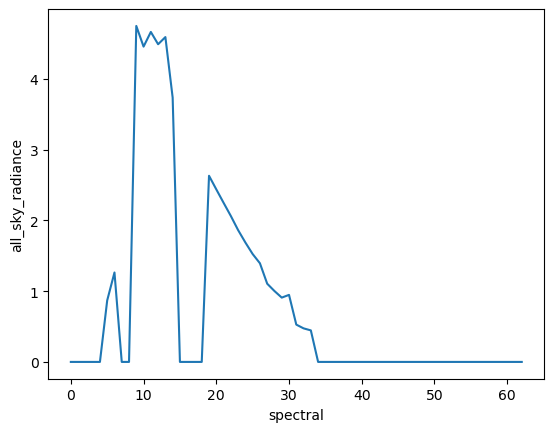

In [3]:
# actually, let's test to see if we can get the same thing first as the plot below with just what we have
#gridded_ds = data_sum_stored.to_xarray()
#data_count_stored = data_count_stored.to_xarray()
print(data_sum_stored.dims)
data_sum_stored_copy=data_sum_stored.mean(dim=['xtrack','sfc_type','latitude_1_deg','longitude_1_deg'])
data_sum_stored_copy["all_sky_radiance"].plot()

Frozen({'xtrack': 8, 'sfc_type': 9, 'spectral': 63, 'latitude_1_deg': 168, 'longitude_1_deg': 353})


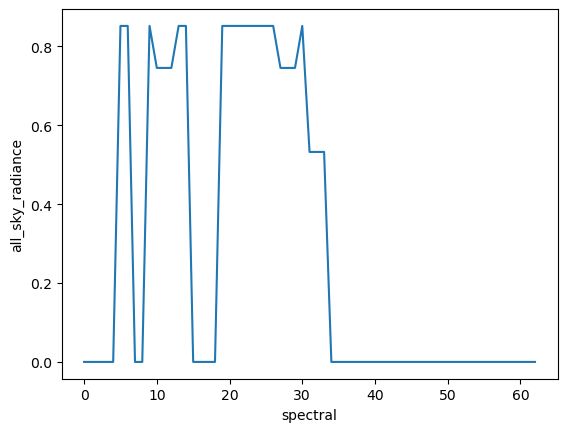

In [4]:
print(data_count_stored.dims)
data_count_stored_copy=data_count_stored.mean(dim=['xtrack','sfc_type','latitude_1_deg','longitude_1_deg'])
data_count_stored_copy["all_sky_radiance"].plot()

Frozen({'xtrack': 8, 'sfc_type': 9, 'spectral': 63, 'latitude_1_deg': 168, 'longitude_1_deg': 353})


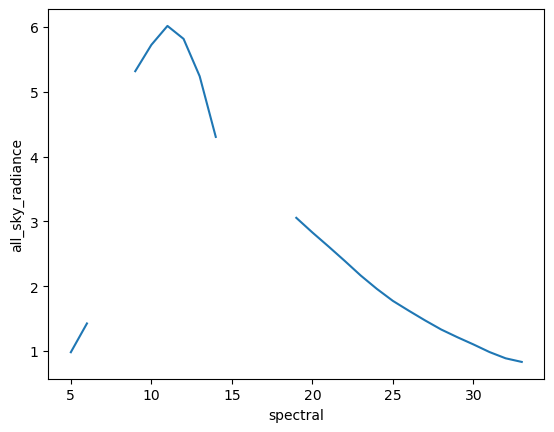

In [6]:
#gridded_ds = data_sum_stored.to_xarray()
#data_count_stored = data_count_stored.to_xarray()

print(gridded_ds.dims)
gridded_ds_copy=gridded_ds.mean(dim=['xtrack','sfc_type','latitude_1_deg','longitude_1_deg'])
gridded_ds_copy["all_sky_radiance"].plot()

<xarray.Dataset>
Dimensions:                (spectral: 63)
Dimensions without coordinates: spectral
Data variables:
    wavelength             (spectral) float32 nan nan nan ... 52.27 53.09 54.11
    idealized_wavelength   (spectral) float32 1.672 2.516 3.359 ... 53.14 53.98
    spectral_radiance_unc  (spectral) float32 nan nan nan ... 0.0379 0.0586
    all_sky_radiance       (spectral) float32 nan nan nan nan ... nan nan nan
    clear_sky_radiance     (spectral) float32 nan nan nan nan ... nan nan nan
    spectral_BT            (spectral) float32 nan nan nan nan ... nan nan nan
    latitude_1_deg         float64 -3.923
    longitude_1_deg        float64 56.88


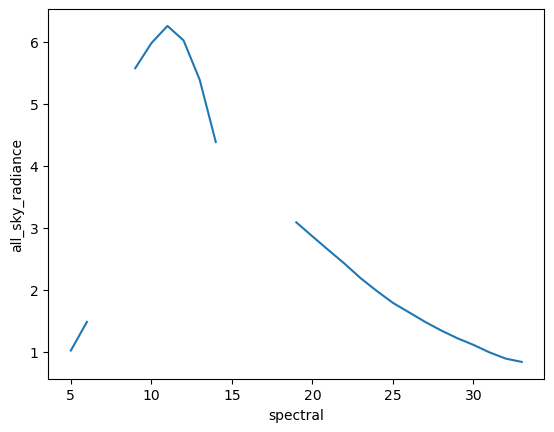

In [55]:
single_file_test=xr.open_dataset(monthly_processed_PREFIRE_files[0])
single_file_test=single_file_test.mean(dim=['xtrack','sfc_type','time'])
print(single_file_test)
single_file_test["all_sky_radiance"].plot()
#this is evidence that there are values with non-nans

<xarray.Dataset>
Dimensions:                (spectral: 63)
Dimensions without coordinates: spectral
Data variables:
    wavelength             (spectral) float32 nan nan nan ... 52.27 53.09 54.11
    idealized_wavelength   (spectral) float32 1.672 2.516 3.359 ... 53.14 53.98
    spectral_radiance_unc  (spectral) float32 nan nan nan ... 0.0379 0.0586
    all_sky_radiance       (spectral) float32 nan nan nan nan ... nan nan nan
    clear_sky_radiance     (spectral) float32 nan nan nan nan ... nan nan nan
    spectral_BT            (spectral) float32 nan nan nan nan ... nan nan nan
    latitude_1_deg         float64 -3.923
    longitude_1_deg        float64 56.88
Frozen({'xtrack': 8, 'sfc_type': 9, 'spectral': 63, 'latitude_1_deg': 168, 'longitude_1_deg': 353})


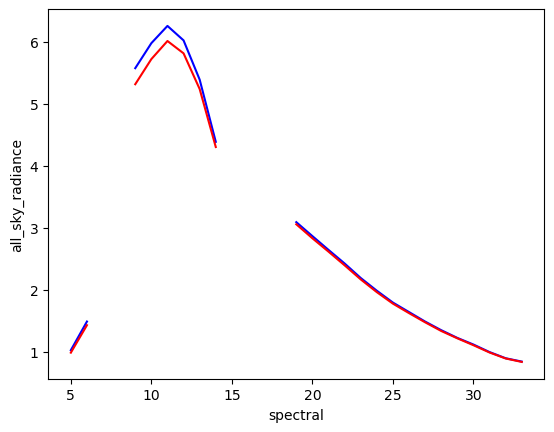

In [3]:
single_file_test=xr.open_dataset(monthly_processed_PREFIRE_files[0])
single_file_test=single_file_test.mean(dim=['xtrack','sfc_type','time'])
print(single_file_test)
single_file_test["all_sky_radiance"].plot(color='blue')
print(gridded_ds.dims)
gridded_ds_copy=gridded_ds.mean(dim=['xtrack','sfc_type','latitude_1_deg','longitude_1_deg'])
gridded_ds_copy["all_sky_radiance"].plot(color='red')

<xarray.Dataset>
Dimensions:                (spectral: 63)
Dimensions without coordinates: spectral
Data variables:
    wavelength             (spectral) float32 dask.array<chunksize=(63,), meta=np.ndarray>
    idealized_wavelength   (spectral) float32 dask.array<chunksize=(63,), meta=np.ndarray>
    spectral_radiance_unc  (spectral) float32 dask.array<chunksize=(63,), meta=np.ndarray>
    all_sky_radiance       (spectral) float32 dask.array<chunksize=(63,), meta=np.ndarray>
    clear_sky_radiance     (spectral) float32 dask.array<chunksize=(63,), meta=np.ndarray>
    spectral_BT            (spectral) float32 dask.array<chunksize=(63,), meta=np.ndarray>
    latitude_1_deg         float64 dask.array<chunksize=(), meta=np.ndarray>
    longitude_1_deg        float64 dask.array<chunksize=(), meta=np.ndarray>
Frozen({'xtrack': 8, 'sfc_type': 9, 'spectral': 63, 'latitude_1_deg': 168, 'longitude_1_deg': 360})


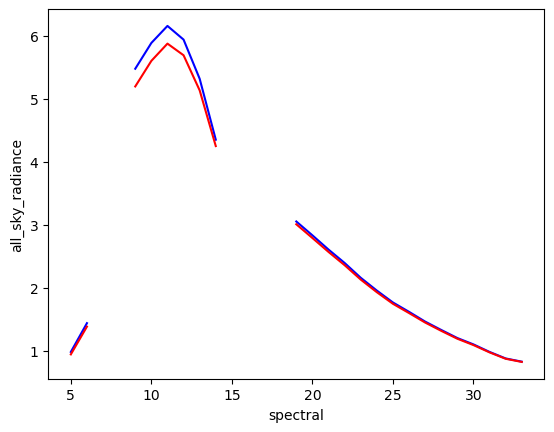

In [16]:
single_file_test=xr.open_mfdataset(monthly_processed_PREFIRE_files[0:16])
single_file_test=single_file_test.mean(dim=['xtrack','sfc_type','time'])
print(single_file_test)
single_file_test["all_sky_radiance"].plot(color='blue')
print(gridded_ds.dims)
gridded_ds_copy=gridded_ds.mean(dim=['xtrack','sfc_type','latitude_1_deg','longitude_1_deg'])
gridded_ds_copy["all_sky_radiance"].plot(color='red')

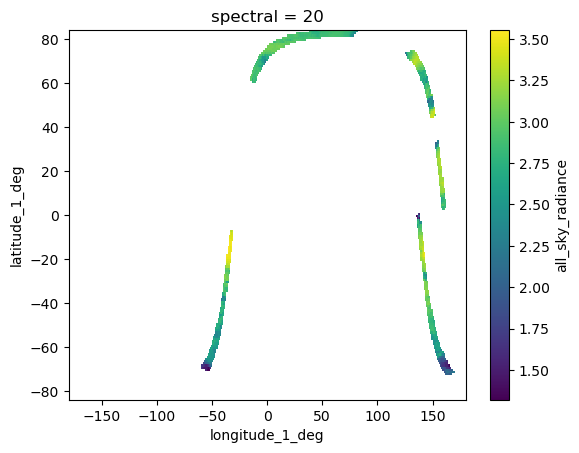

In [2]:
gridded_ds_copy=gridded_ds.mean(dim=['xtrack','sfc_type']).sel(spectral=20)
gridded_ds_copy["all_sky_radiance"].plot()

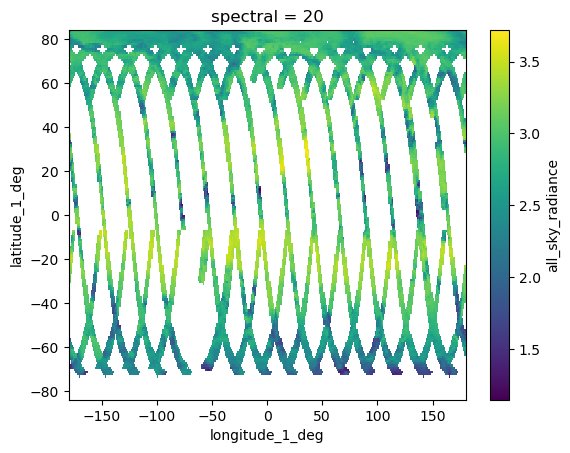

In [15]:
gridded_ds_copy=gridded_ds.mean(dim=['xtrack','sfc_type']).sel(spectral=20)
gridded_ds_copy["all_sky_radiance"].plot()

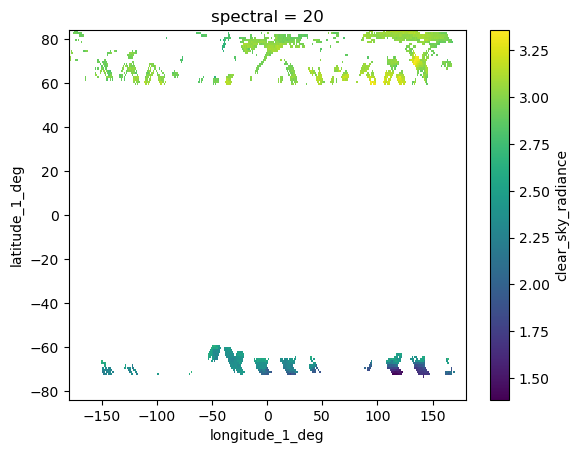

In [4]:
gridded_ds_copy=gridded_ds.mean(dim=['xtrack','sfc_type']).sel(spectral=20)
gridded_ds_copy["clear_sky_radiance"].plot()

In [3]:
# I am curious to get the count though since I know that will be the same:
processed_ds=xr.open_mfdataset("/scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_Monthly/2024_06/*.nc")
gridded_count_ds=xr.open_dataset("/scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_Monthly/Monthly_L3/Count_Files/PREFIRE_1B-RAD_Gridded_and_Masked_Count_2024_06.nc")
gridded_ds=xr.open_dataset("/scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_Monthly/Monthly_L3/Gridcell_Averaged_Files/PREFIRE_1B-RAD_Gridded_and_Masked_2024_06.nc")

In [5]:
gridded_ds.dims

Frozen({'xtrack': 8, 'sfc_type': 9, 'spectral': 63, 'latitude_1_deg': 168, 'longitude_1_deg': 360})

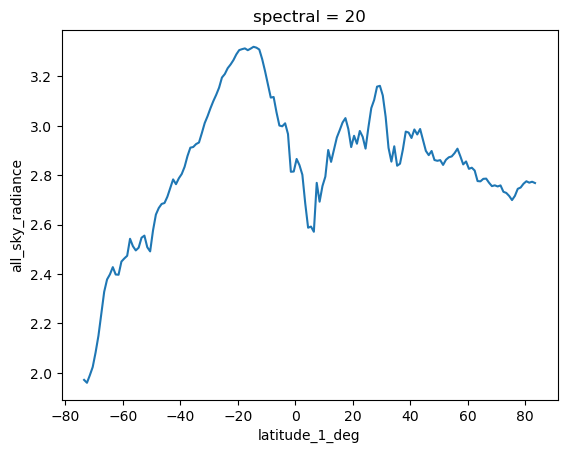

In [6]:
gridded_ds_copy=gridded_ds.mean(dim=['xtrack','sfc_type','longitude_1_deg']).sel(spectral=20)
gridded_ds_copy["all_sky_radiance"].plot()

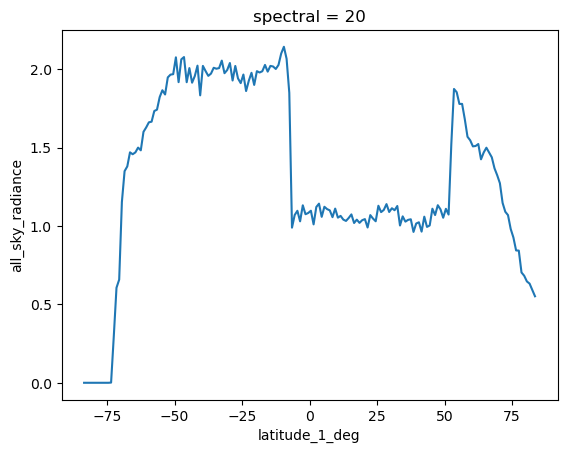

In [4]:
gridded_count_ds_copy=gridded_count_ds.mean(dim=['xtrack','sfc_type','longitude_1_deg']).sel(spectral=20)
gridded_count_ds_copy["all_sky_radiance"].plot()

In [4]:
single_file_test=xr.open_dataset(monthly_processed_PREFIRE_files[0])
print(single_file_test.dims)
single_file_test=single_file_test.mean(dim=['xtrack','sfc_type','time'])
single_file_test.

Frozen({'xtrack': 8, 'spectral': 63, 'time': 7192, 'sfc_type': 9})


In [7]:
#test to make sure that all of the values for the first 10 granules of June aren't 0
monthly_processed_PREFIRE_files=glob.glob("/scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_Monthly/2024_06/*.nc") # you can change this for your desired month
monthly_processed_PREFIRE_files.sort()
ten_file_test=xr.open_mfdataset(monthly_processed_PREFIRE_files[0:10])

In [13]:
import xarray as xr
import numpy as np

data = xr.DataArray(
    [1.0, np.nan, 2.0, np.nan, np.nan],
    dims="obs",
    coords={"group": ('obs', ['A', 'A', 'B', 'B', 'C'])}
)

grouped = data.groupby("group").sum()
print(grouped.values)

[1. 2. 0.]


In [10]:
print(ten_file_test['all_sky_radiance'].sum().values)

25397456.0


In [4]:
data_count_stored

spectral_radiance_unc  \
xtrack sfc_type spectral latitude_1_deg longitude_1_deg                          
0      0        0        -83.5          -154.5                               0   
                                        -153.5                               0   
                                        -152.5                               0   
                                        -151.5                               0   
                                        -150.5                               0   
...                                                                        ...   
7      8        62        83.5           87.5                                3   
                                         88.5                                3   
                                         89.5                                3   
                                         90.5                                3   
                                         91.5                                3   

                                                         all_sky_radiance  \
xtrack sfc_type spectral latitude_1_deg longitude_1_deg                     
0      0        0        -83.5          -154.5                          0   
                                        -153.5                          0   
                                        -152.5                          0   
                                        -151.5                          0   
                                        -150.5                          0   
...                                                                   ...   
7      8        62        83.5           87.5                           0   
                                         88.5                           0   
                                         89.5                           0   
                                         90.5                           0   
                                         91.5                           0   

                                                         clear_sky_radiance  \
xtrack sfc_type spectral latitude_1_deg longitude_1_deg                       
0      0        0        -83.5          -154.5                            0   
                                        -153.5                            0   
                                        -152.5                            0   
                                        -151.5                            0   
                                        -150.5                            0   
...                                                                     ...   
7      8        62        83.5           87.5                             0   
                                         88.5                             0   
                                         89.5                             0   
                                         90.5                             0   
                                         91.5                             0   

                                                         spectral_BT  
xtrack sfc_type spectral latitude_1_deg longitude_1_deg               
0      0        0        -83.5          -154.5                     0  
                                        -153.5                     0  
                                        -152.5                     0  
                                        -151.5                     0  
                                        -150.5                     0  
...                                                              ...  
7      8        62        83.5           87.5                      0  
                                         88.5                      0  
                                         89.5                      0  
                                         90.5                      0  
                                         91.5                      0  

[2962008 rows x 4 columns]

In [5]:
data_sum_stored

spectral_radiance_unc  \
xtrack sfc_type spectral latitude_1_deg longitude_1_deg                          
0      0        0        -83.5          -154.5                        0.000000   
                                        -153.5                        0.000000   
                                        -152.5                        0.000000   
                                        -151.5                        0.000000   
                                        -150.5                        0.000000   
...                                                                        ...   
7      8        62        83.5           87.5                         0.329643   
                                         88.5                         0.329643   
                                         89.5                         0.329643   
                                         90.5                         0.329643   
                                         91.5                         0.329643   

                                                         all_sky_radiance  \
xtrack sfc_type spectral latitude_1_deg longitude_1_deg                     
0      0        0        -83.5          -154.5                        0.0   
                                        -153.5                        0.0   
                                        -152.5                        0.0   
                                        -151.5                        0.0   
                                        -150.5                        0.0   
...                                                                   ...   
7      8        62        83.5           87.5                         0.0   
                                         88.5                         0.0   
                                         89.5                         0.0   
                                         90.5                         0.0   
                                         91.5                         0.0   

                                                         clear_sky_radiance  \
xtrack sfc_type spectral latitude_1_deg longitude_1_deg                       
0      0        0        -83.5          -154.5                          0.0   
                                        -153.5                          0.0   
                                        -152.5                          0.0   
                                        -151.5                          0.0   
                                        -150.5                          0.0   
...                                                                     ...   
7      8        62        83.5           87.5                           0.0   
                                         88.5                           0.0   
                                         89.5                           0.0   
                                         90.5                           0.0   
                                         91.5                           0.0   

                                                         spectral_BT  
xtrack sfc_type spectral latitude_1_deg longitude_1_deg               
0      0        0        -83.5          -154.5                   0.0  
                                        -153.5                   0.0  
                                        -152.5                   0.0  
                                        -151.5                   0.0  
                                        -150.5                   0.0  
...                                                              ...  
7      8        62        83.5           87.5                    0.0  
                                         88.5                    0.0  
                                         89.5                    0.0  
                                         90.5                    0.0  
                                         91.5                    0.0  

[2962008 rows x 4 columns]

In [17]:
print(4+np.nan)

nan


In [2]:
gridded_ds = data_sum_stored.to_xarray()

In [3]:
gridded_ds

<xarray.Dataset>
Dimensions:                (xtrack: 8, sfc_type: 9, spectral: 63,
                            latitude_1_deg: 168, longitude_1_deg: 360)
Coordinates:
  * xtrack                 (xtrack) int64 0 1 2 3 4 5 6 7
  * sfc_type               (sfc_type) int64 0 1 2 3 4 5 6 7 8
  * spectral               (spectral) int64 0 1 2 3 4 5 6 ... 57 58 59 60 61 62
  * latitude_1_deg         (latitude_1_deg) float64 -83.5 -82.5 ... 82.5 83.5
  * longitude_1_deg        (longitude_1_deg) float64 -179.5 -178.5 ... 179.5
Data variables:
    spectral_radiance_unc  (xtrack, sfc_type, spectral, latitude_1_deg, longitude_1_deg) float64 ...
    all_sky_radiance       (xtrack, sfc_type, spectral, latitude_1_deg, longitude_1_deg) float64 ...
    clear_sky_radiance     (xtrack, sfc_type, spectral, latitude_1_deg, longitude_1_deg) float64 ...
    spectral_BT            (xtrack, sfc_type, spectral, latitude_1_deg, longitude_1_deg) float64 ...

In [23]:
#let's plot really quickly!
gridded_ds_plot_test=gridded_ds.mean(dim=['xtrack', 'sfc_type']).sel(spectral=1)

In [9]:
gridded_ds_plot_test_all_sky=gridded_ds_plot_test['all_sky_radiance']
print(gridded_ds_plot_test_all_sky.shape)

(168, 360)


In [19]:


# Find elements equal to 2 and convert to list
#twos = gridded_ds_plot_test_all_sky.where(gridded_ds_plot_test_all_sky == np.nan, drop=True).values.tolist()
twos = gridded_ds_plot_test_all_sky.where(gridded_ds_plot_test_all_sky == np.nan, drop=True).values.tolist()

print(twos)

[]


In [4]:
gridded_ds_plot_test

<xarray.Dataset>
Dimensions:                (latitude_1_deg: 168, longitude_1_deg: 360)
Coordinates:
    spectral               int64 22
  * latitude_1_deg         (latitude_1_deg) float64 -83.5 -82.5 ... 82.5 83.5
  * longitude_1_deg        (longitude_1_deg) float64 -179.5 -178.5 ... 179.5
Data variables:
    spectral_radiance_unc  (latitude_1_deg, longitude_1_deg) float64 nan ... nan
    all_sky_radiance       (latitude_1_deg, longitude_1_deg) float64 nan ... nan
    clear_sky_radiance     (latitude_1_deg, longitude_1_deg) float64 nan ... nan
    spectral_BT            (latitude_1_deg, longitude_1_deg) float64 nan ... nan

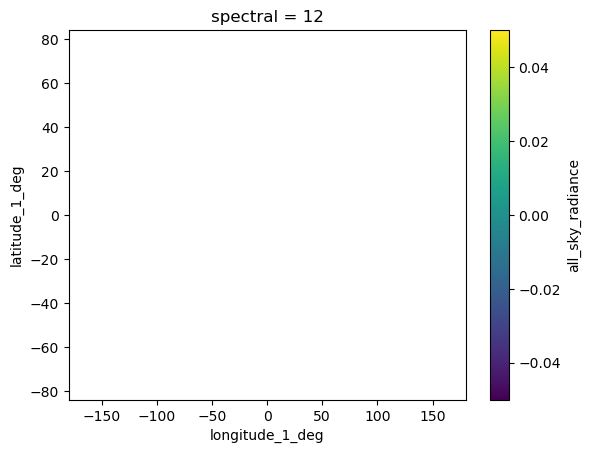

In [37]:
gridded_ds_plot_test=gridded_ds.mean(dim=['xtrack', 'sfc_type']).sel(spectral=12)
gridded_ds_plot_test['all_sky_radiance'].plot()
#wait, what? so if you print out all the values as a list, it just gives you nans, so I'm a bit lost

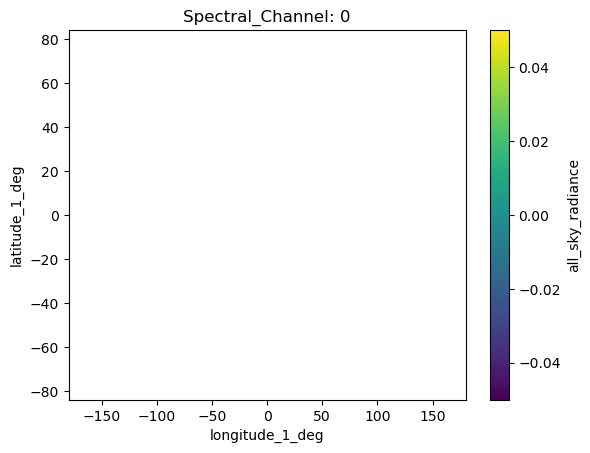

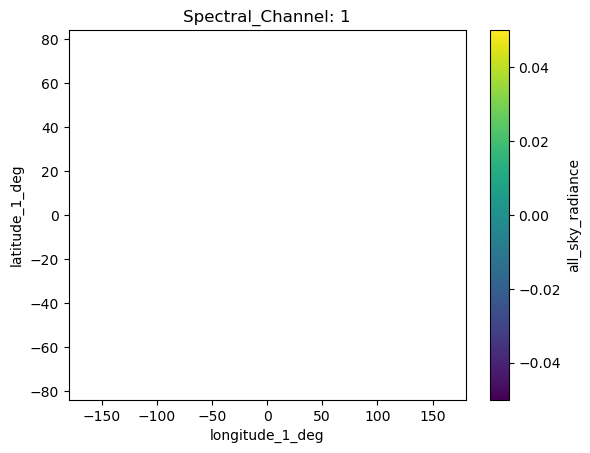

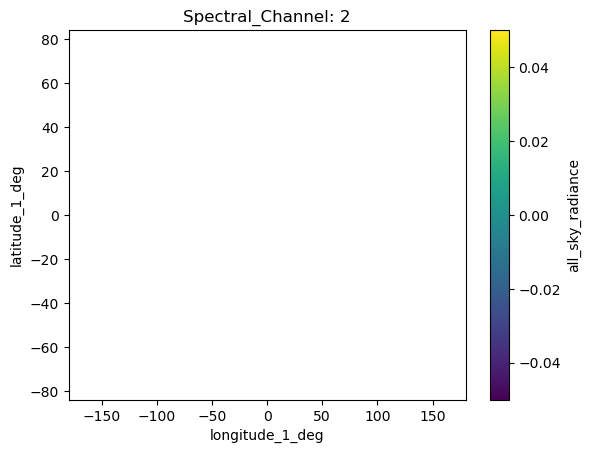

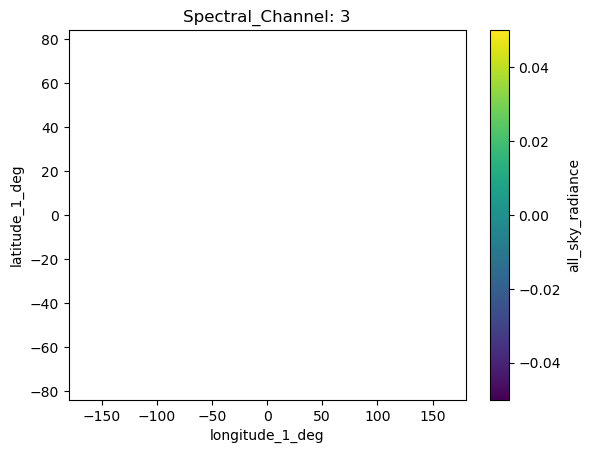

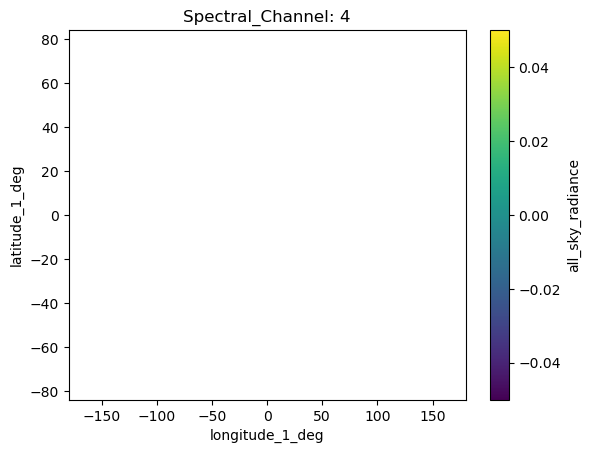

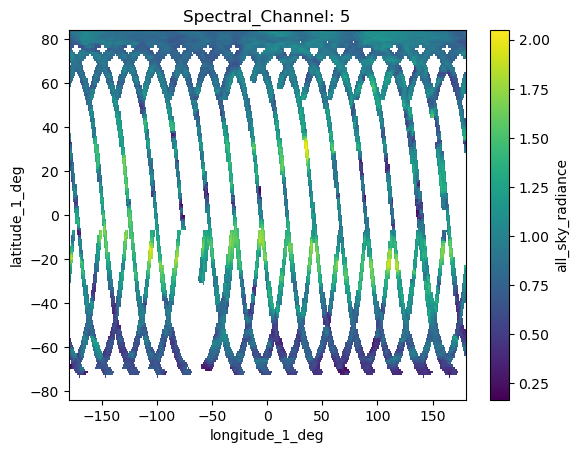

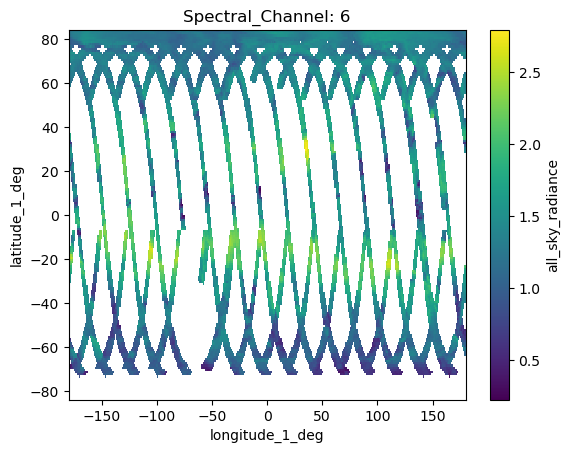

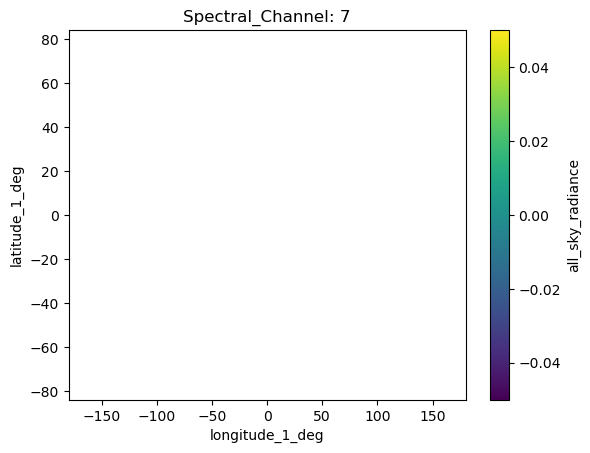

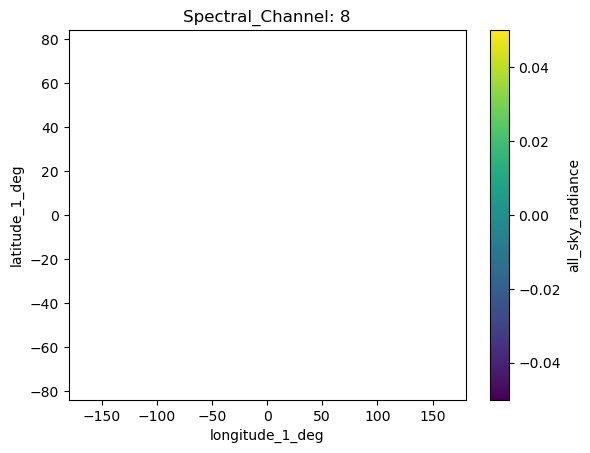

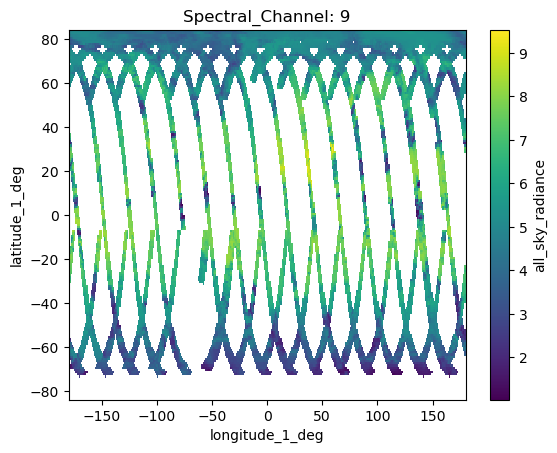

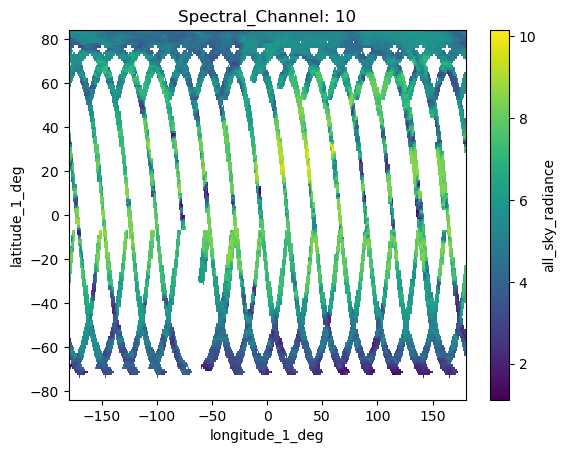

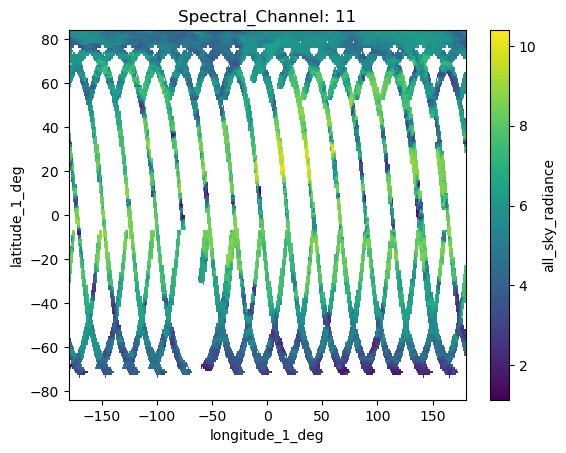

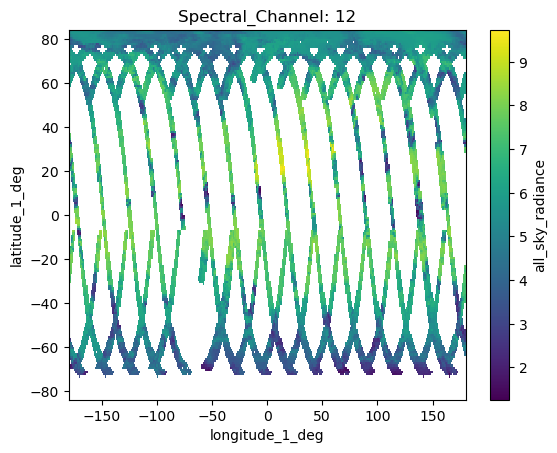

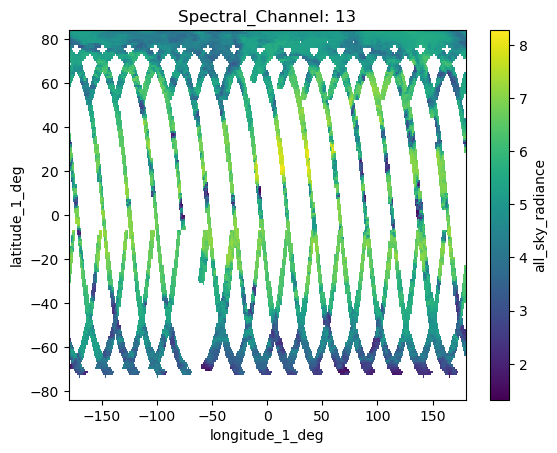

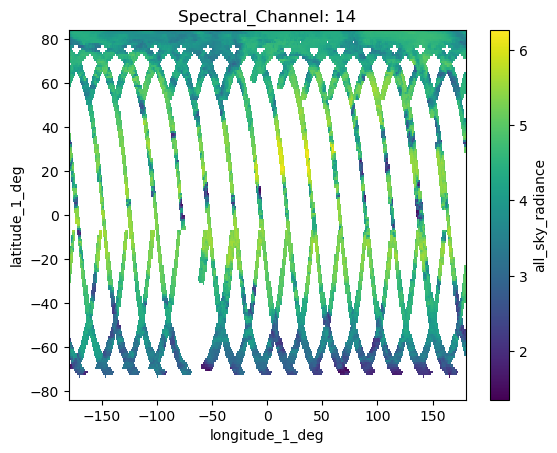

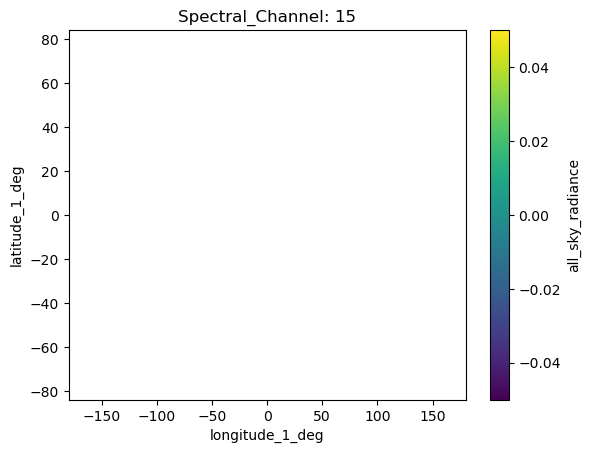

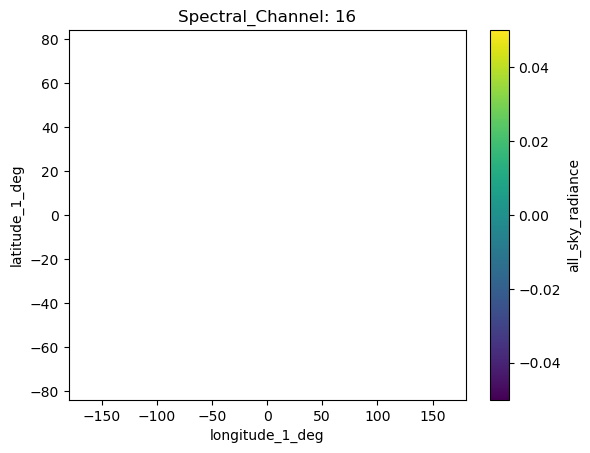

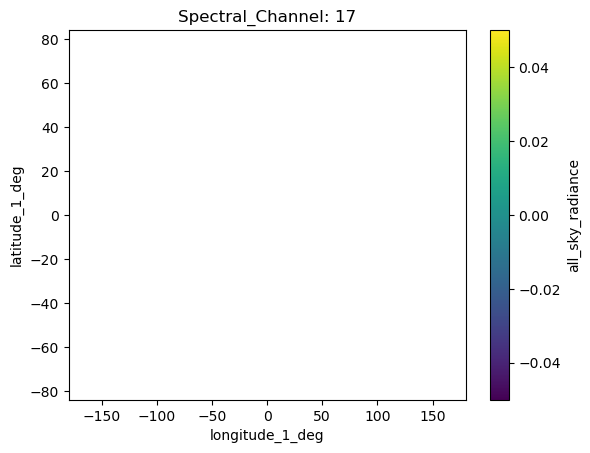

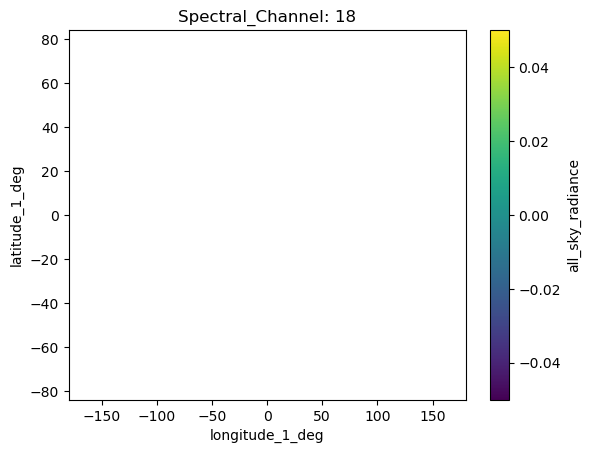

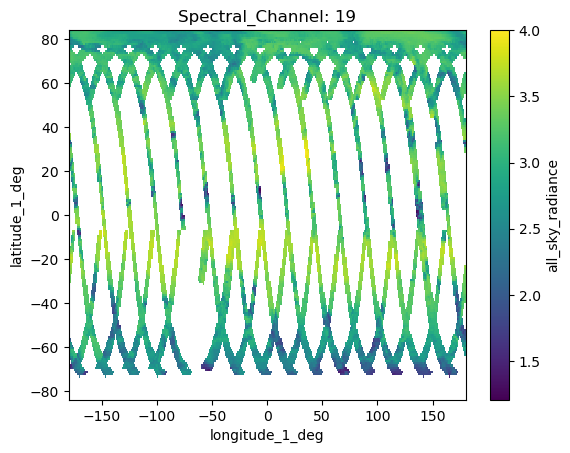

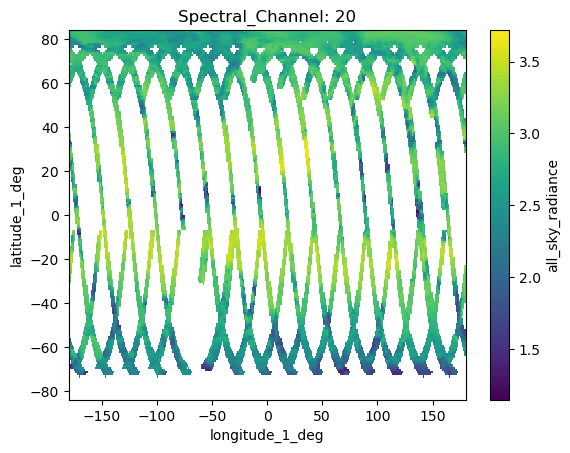

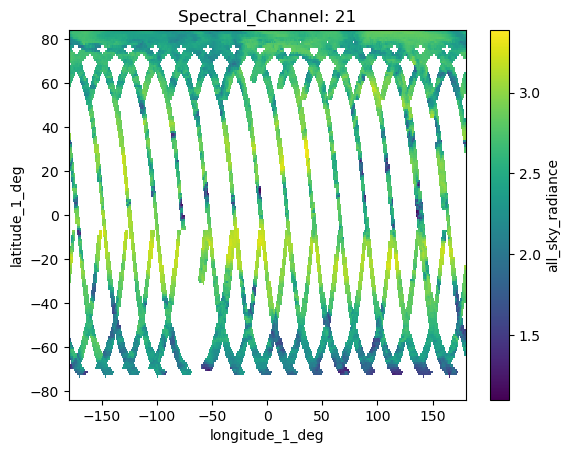

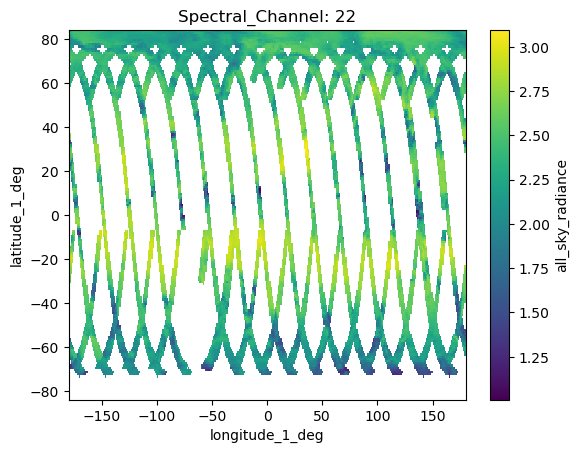

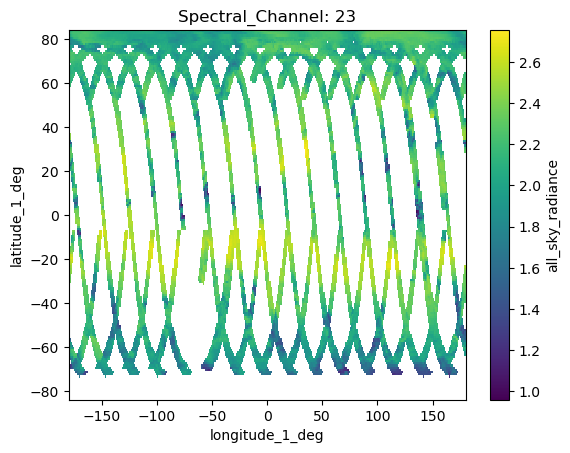

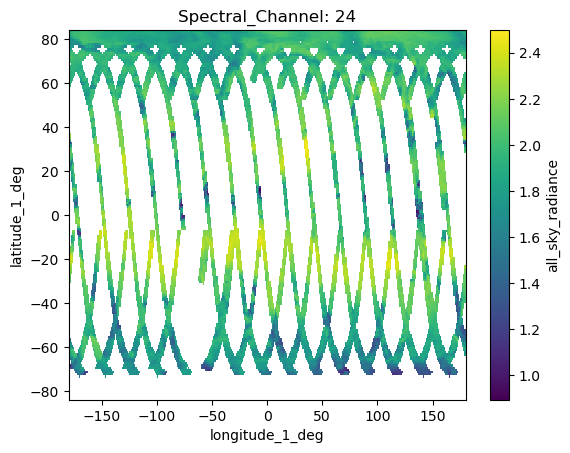

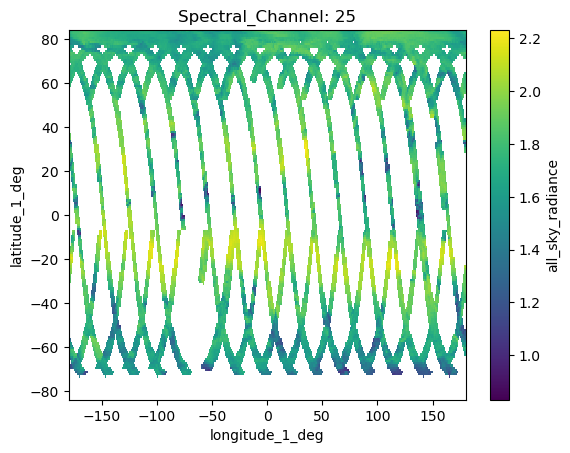

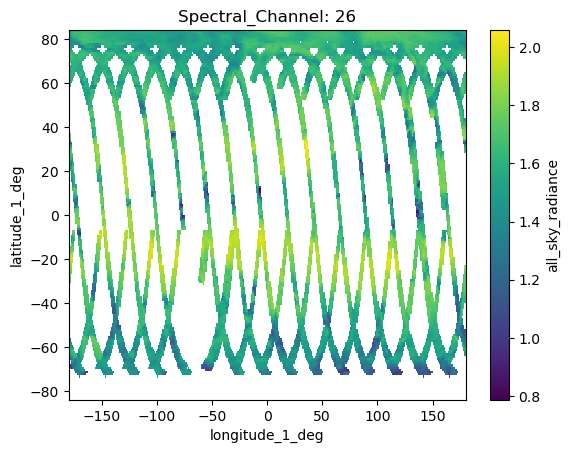

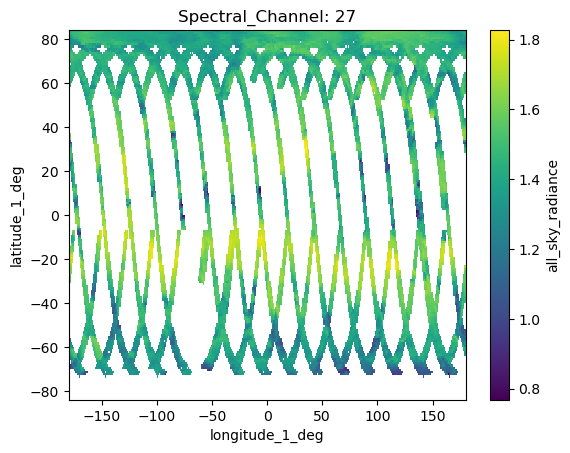

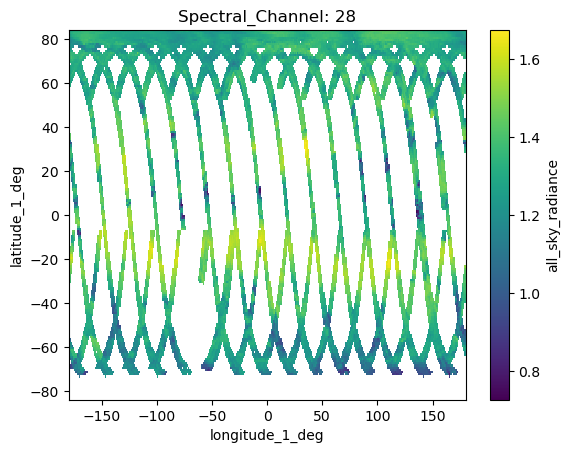

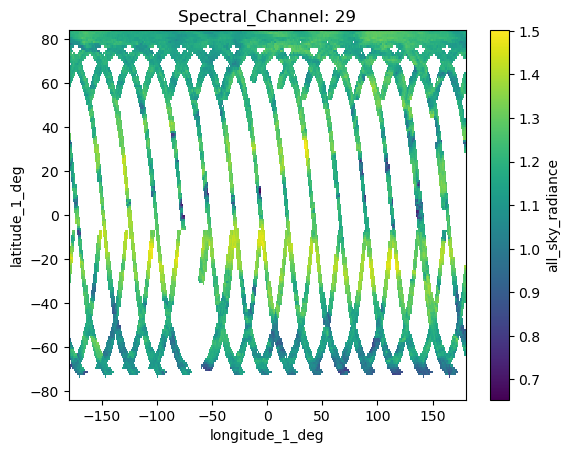

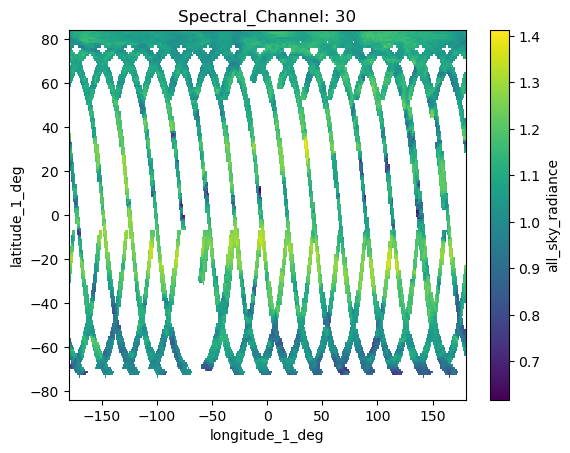

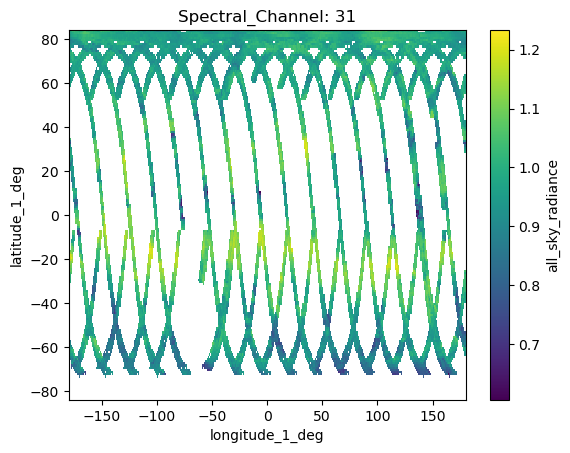

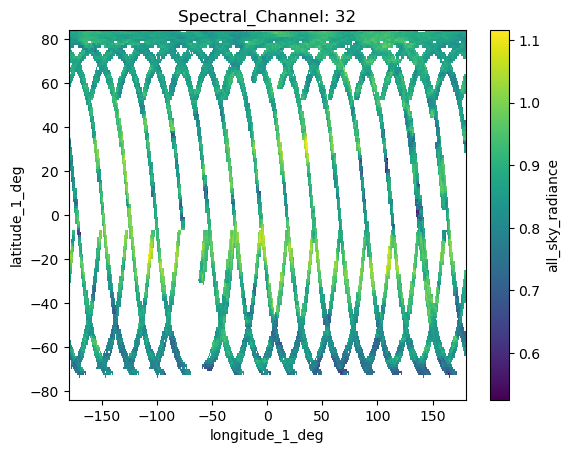

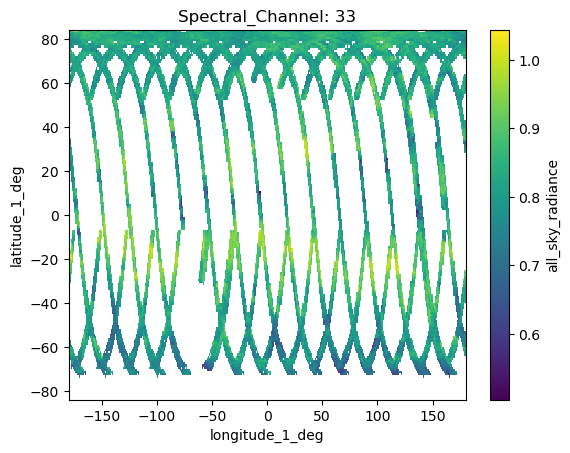

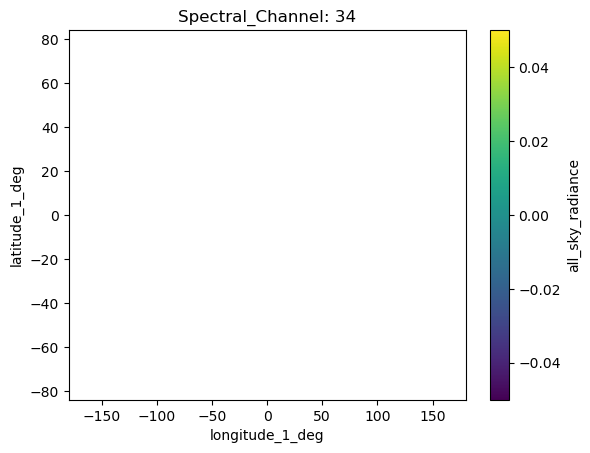

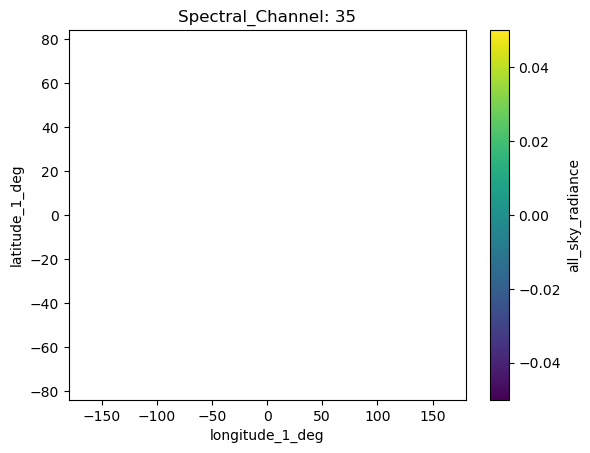

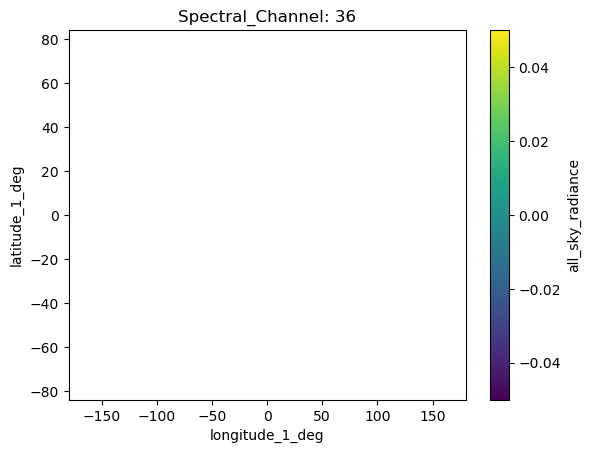

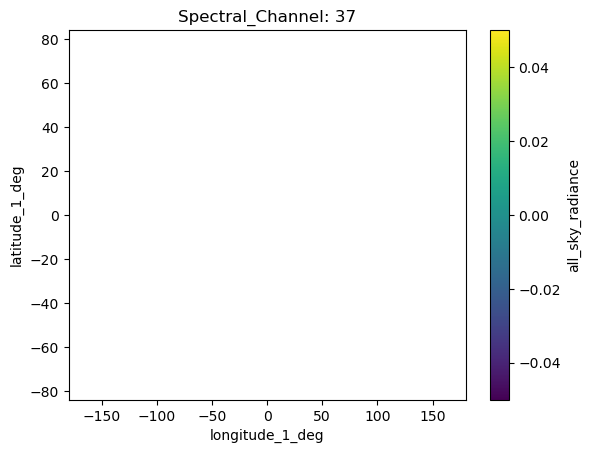

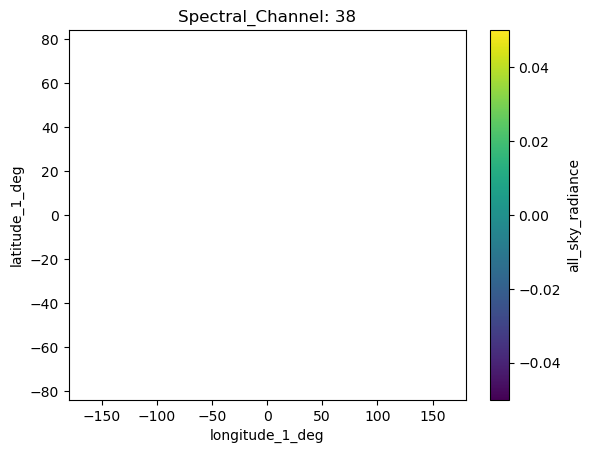

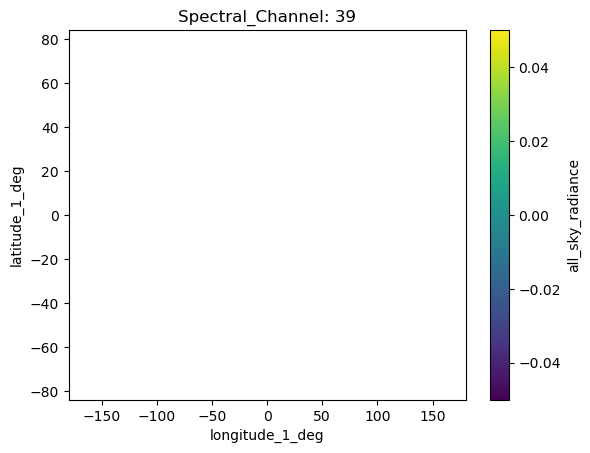

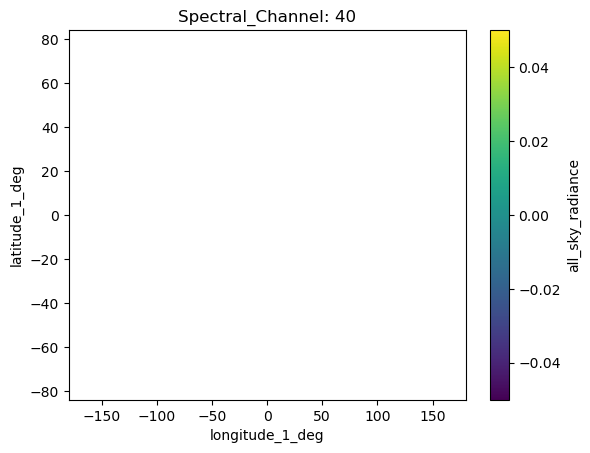

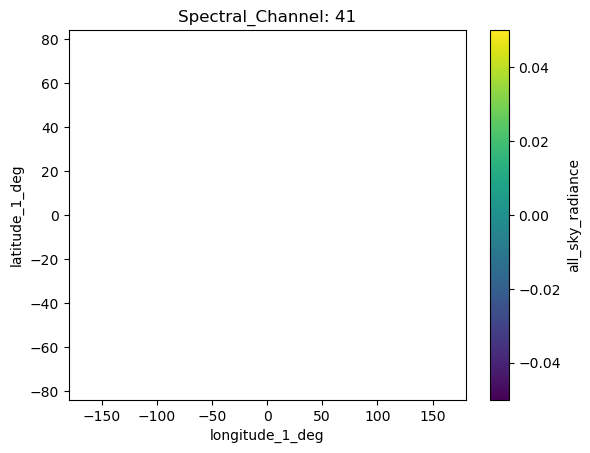

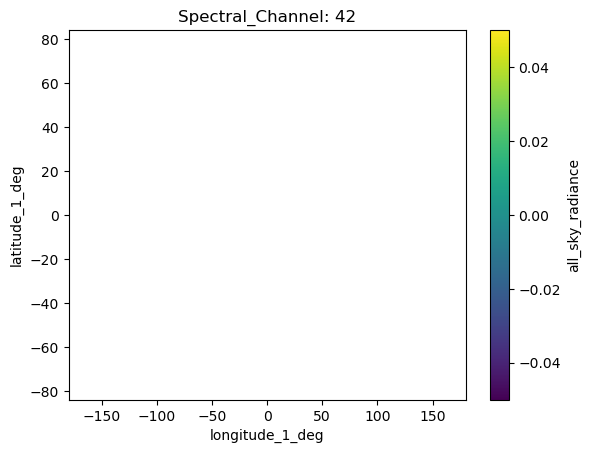

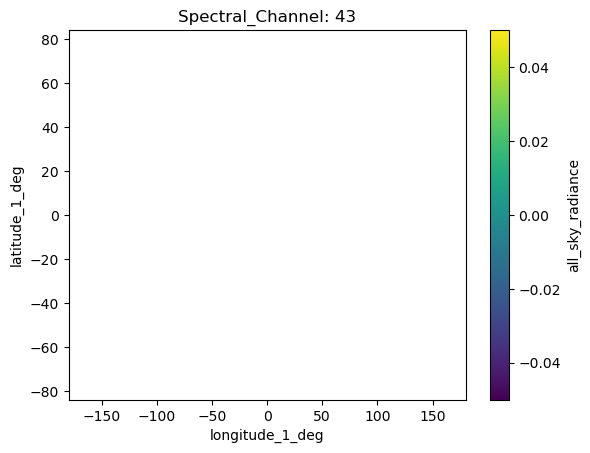

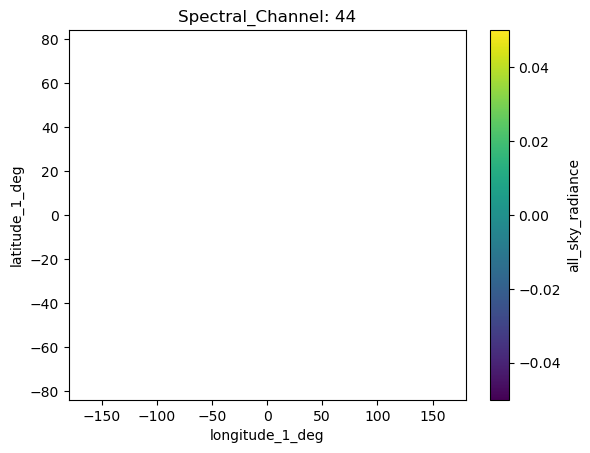

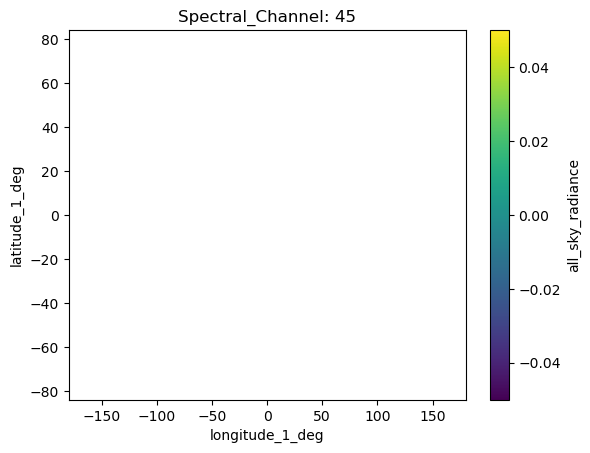

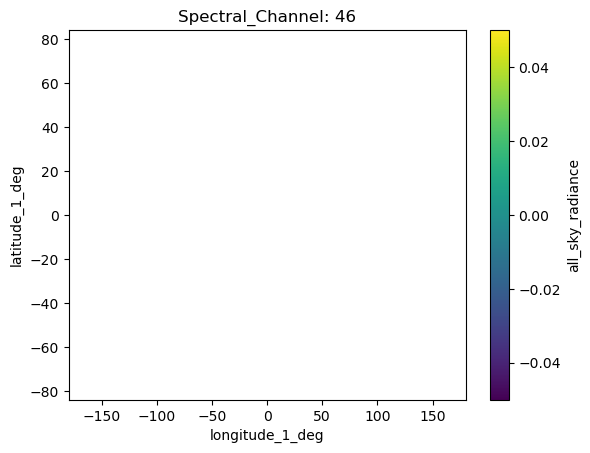

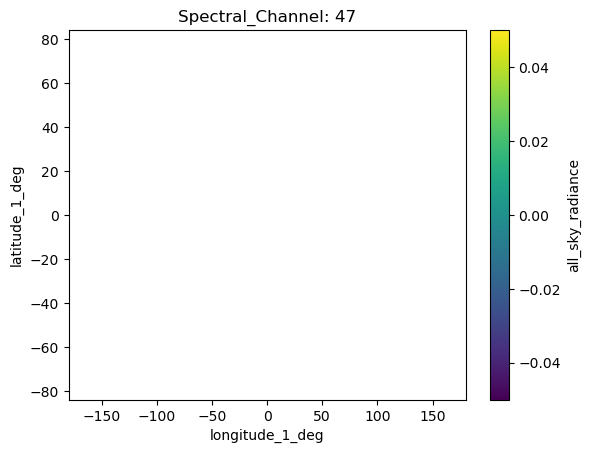

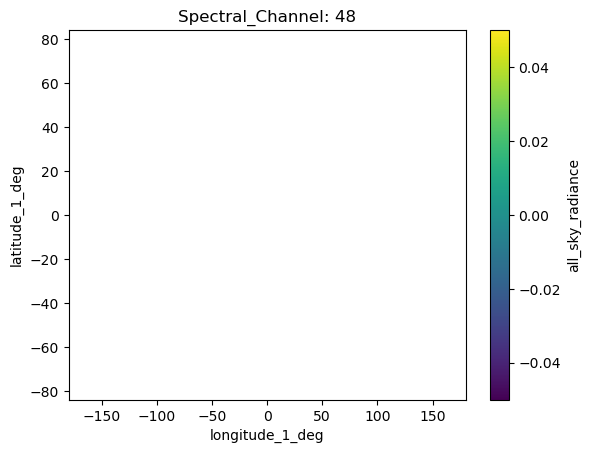

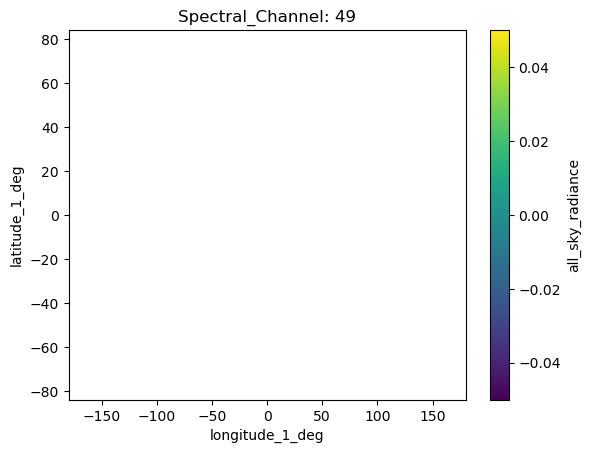

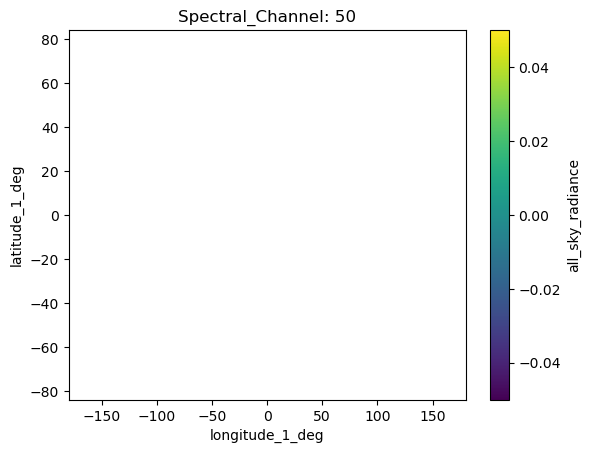

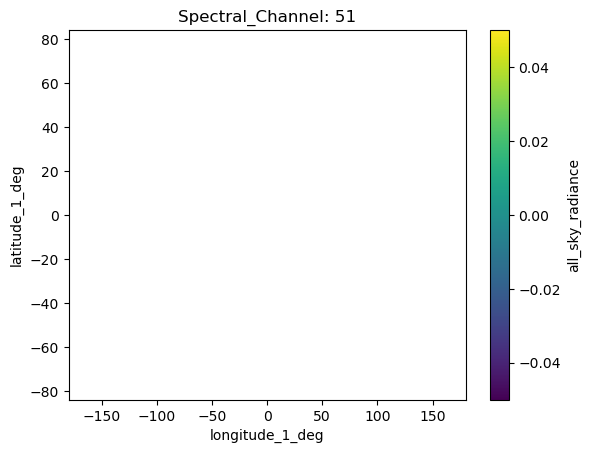

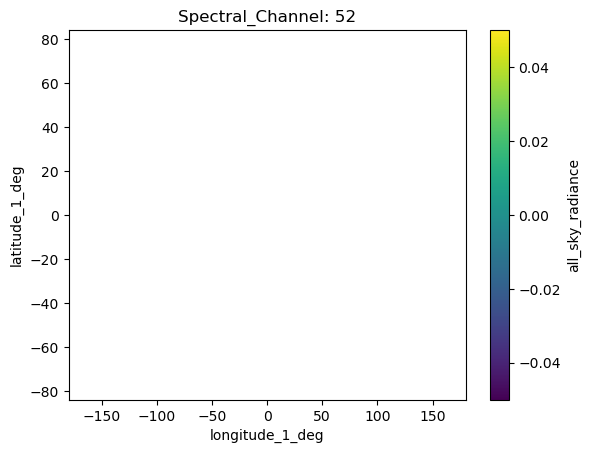

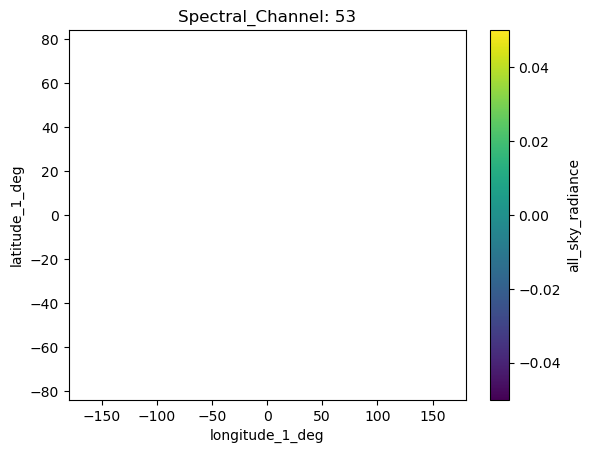

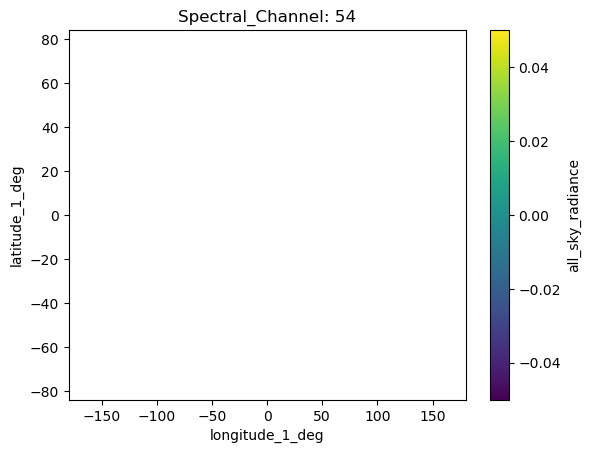

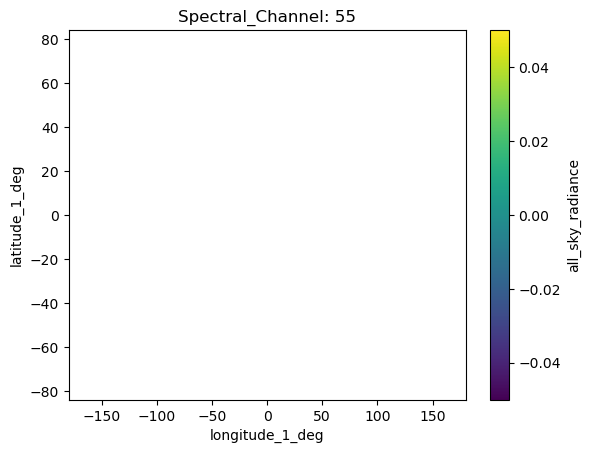

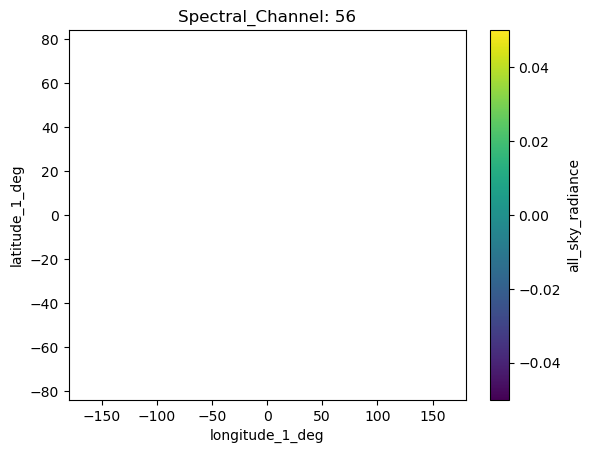

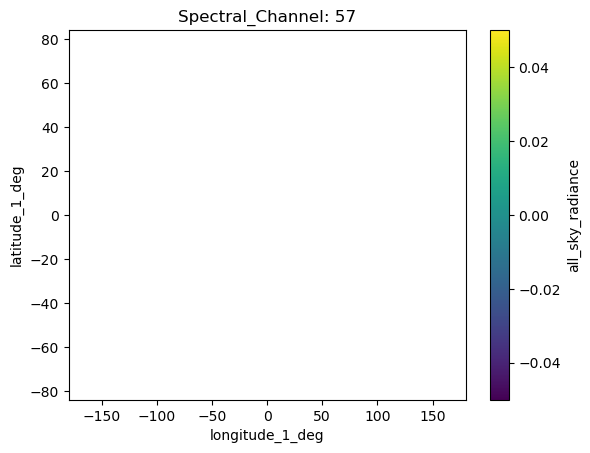

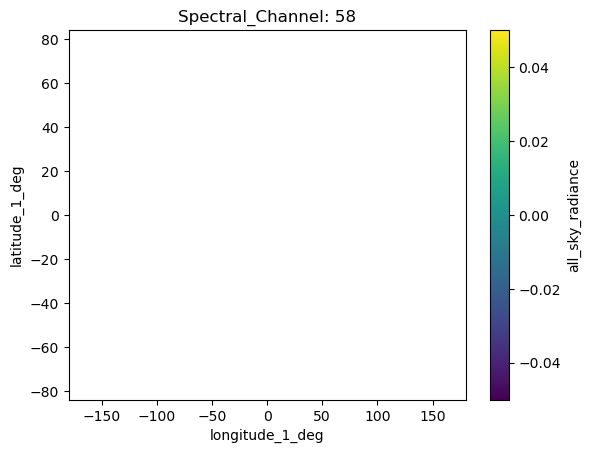

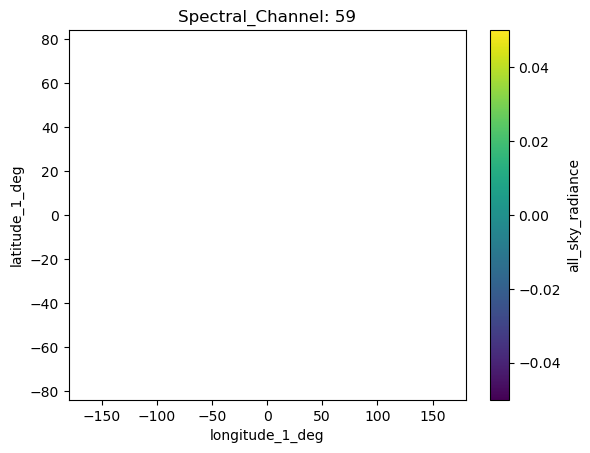

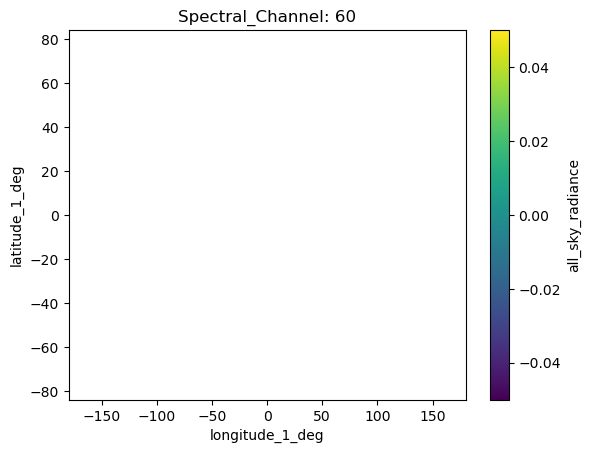

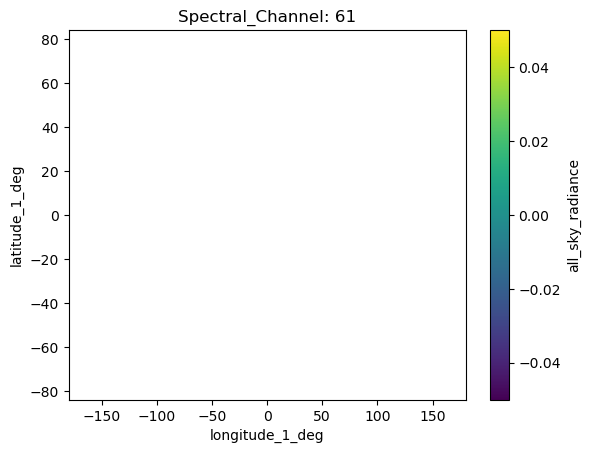

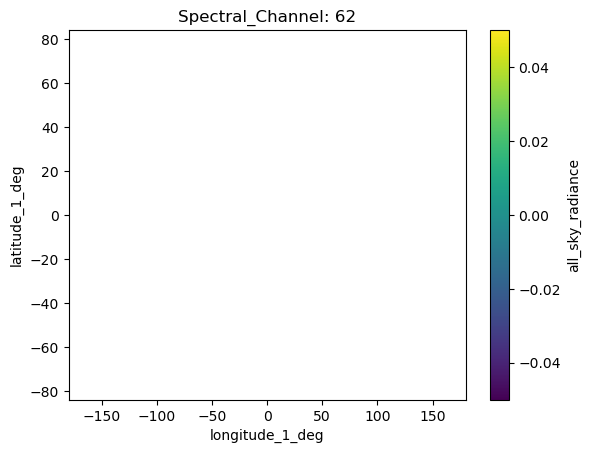

In [18]:
gridded_ds_plot_test=gridded_ds.mean(dim=['xtrack', 'sfc_type'])
gridded_ds_plot_test=gridded_ds_plot_test['all_sky_radiance']
for t in gridded_ds_plot_test.spectral:
    plt.figure()
    gridded_ds_plot_test.sel(spectral=t).plot()  # Plot 2D slice
    plt.title(f"Spectral_Channel: {t.values}")
    plt.show()

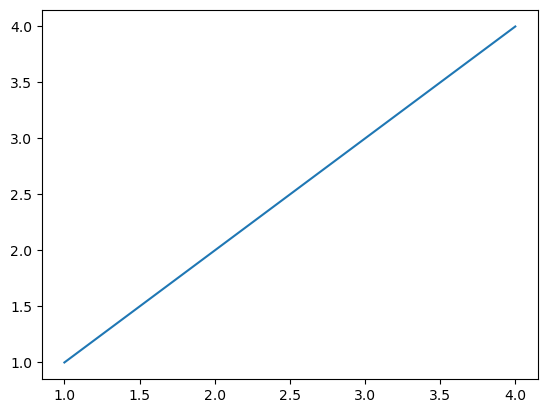

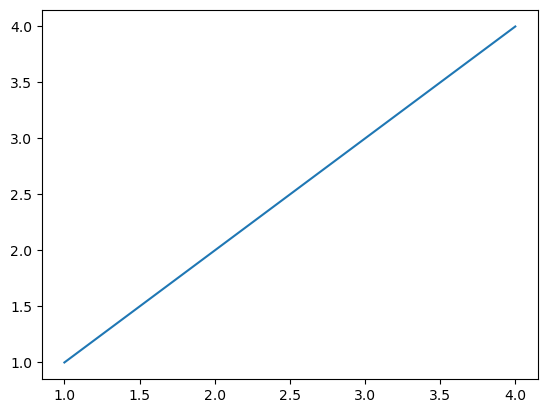

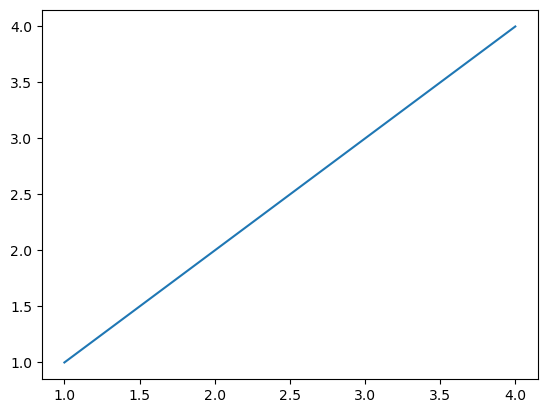

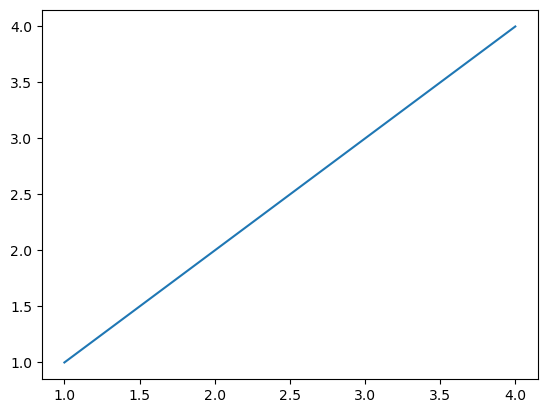

In [33]:
import matplotlib.pyplot as plt
x=[[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4]]
y=[[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4]]
for i in range(len(x)):
    plt.figure()
    plt.plot(x[i],y[i])
    # Show/save figure as desired.
    plt.show()
# Can show all four figures at once by calling plt.show() here, outside the loop.
#plt.show()

In [15]:
#uh oh, let's test something to see if this is a plotting area
print(gridded_ds_plot_test['all_sky_radiance'].count().values)
print(gridded_ds['all_sky_radiance'].count().values)
#hmm, so it is not a plotting error

0
0


In [15]:
df = pd.DataFrame({
    'Department': ['HR', 'IT', 'HR', 'IT', 'Finance', 'Finance'],
    'Salary': [50000, 60000, 52000, 61000, 55000, 54000],
    'Employees': [3, 5, 2, 4, 3, 2]
})

# Group by Department and get total salary
print(df.groupby('Department')['Salary'].sum())

# Group by Department and get average salary
print(df.groupby('Department')['Salary'].mean())

# Group by Department and count entries
print(df.groupby('Department').count())  # Counts all non-null values per column

Department
Finance    109000
HR         102000
IT         121000
Name: Salary, dtype: int64
Department
Finance    54500.0
HR         51000.0
IT         60500.0
Name: Salary, dtype: float64
            Salary  Employees
Department                   
Finance          2          2
HR               2          2
IT               2          2


In [27]:
ds

<xarray.Dataset>
Dimensions:                (xtrack: 8, spectral: 63, time: 6888, sfc_type: 9)
Coordinates:
  * time                   (time) datetime64[ns] 2024-12-31T23:51:50.06365004...
Dimensions without coordinates: xtrack, spectral, sfc_type
Data variables:
    wavelength             (xtrack, spectral) float32 ...
    idealized_wavelength   (xtrack, spectral) float32 ...
    spectral_radiance_unc  (time, xtrack, spectral) float32 ...
    all_sky_radiance       (time, xtrack, spectral, sfc_type) float32 ...
    clear_sky_radiance     (time, xtrack, spectral, sfc_type) float32 ...
    spectral_BT            (time, xtrack, spectral) float32 ...
    latitude_1_deg         (time, xtrack) float64 ...
    longitude_1_deg        (time, xtrack) float64 ...

In [12]:
June_ds

<xarray.Dataset>
Dimensions:                (xtrack: 8, spectral: 63, time: 5278, sfc_type: 9)
Coordinates:
  * time                   (time) datetime64[ns] 2024-06-30T22:43:22.54464998...
Dimensions without coordinates: xtrack, spectral, sfc_type
Data variables:
    wavelength             (xtrack, spectral) float32 ...
    idealized_wavelength   (xtrack, spectral) float32 ...
    spectral_radiance_unc  (time, xtrack, spectral) float32 ...
    all_sky_radiance       (time, xtrack, spectral, sfc_type) float32 ...
    clear_sky_radiance     (time, xtrack, spectral, sfc_type) float32 ...
    spectral_BT            (time, xtrack, spectral) float32 ...
    latitude_1_deg         (time, xtrack) float64 ...
    longitude_1_deg        (time, xtrack) float64 ...

In [13]:
July_ds

<xarray.Dataset>
Dimensions:                (xtrack: 8, spectral: 63, time: 1543, sfc_type: 9)
Coordinates:
  * time                   (time) datetime64[ns] 2024-07-01T00:00:00.49464998...
Dimensions without coordinates: xtrack, spectral, sfc_type
Data variables:
    wavelength             (xtrack, spectral) float32 nan nan ... 53.09 54.11
    idealized_wavelength   (xtrack, spectral) float32 1.672 2.516 ... 53.98
    spectral_radiance_unc  (time, xtrack, spectral) float32 ...
    all_sky_radiance       (time, xtrack, spectral, sfc_type) float32 ...
    clear_sky_radiance     (time, xtrack, spectral, sfc_type) float32 ...
    spectral_BT            (time, xtrack, spectral) float32 ...
    latitude_1_deg         (time, xtrack) float64 ...
    longitude_1_deg        (time, xtrack) float64 ...

In [1]:
# let's try july since it is the first full month of data
import xarray as xr
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset, num2date
ds=xr.open_mfdataset("/scratch/alpine/etdu2967/PREFIRE/Processed_Files_R01_Monthly/2024_07/*nc")

In [2]:
ds

<xarray.Dataset>
Dimensions:                (time: 3536669, xtrack: 8, spectral: 63, sfc_type: 9)
Coordinates:
  * time                   (time) datetime64[ns] 2024-07-01T00:18:40.20165004...
Dimensions without coordinates: xtrack, spectral, sfc_type
Data variables:
    wavelength             (time, xtrack, spectral) float32 dask.array<chunksize=(7865, 8, 63), meta=np.ndarray>
    idealized_wavelength   (time, xtrack, spectral) float32 dask.array<chunksize=(7865, 8, 63), meta=np.ndarray>
    spectral_radiance_unc  (time, xtrack, spectral) float32 dask.array<chunksize=(7865, 8, 63), meta=np.ndarray>
    all_sky_radiance       (time, xtrack, spectral, sfc_type) float32 dask.array<chunksize=(7865, 8, 63, 9), meta=np.ndarray>
    clear_sky_radiance     (time, xtrack, spectral, sfc_type) float32 dask.array<chunksize=(7865, 8, 63, 9), meta=np.ndarray>
    spectral_BT            (time, xtrack, spectral) float32 dask.array<chunksize=(7865, 8, 63), meta=np.ndarray>
    latitude_1_deg         (time, xtrack) float64 dask.array<chunksize=(7865, 8), meta=np.ndarray>
    longitude_1_deg        (time, xtrack) float64 dask.array<chunksize=(7865, 8), meta=np.ndarray>

In [20]:
df=ds.to_dataframe

In [21]:
df

<bound method Dataset.to_dataframe of <xarray.Dataset>
Dimensions:                (xtrack: 8, spectral: 63, time: 7192, sfc_type: 9)
Coordinates:
  * time                   (time) datetime64[ns] 2024-06-29T21:18:44.97765004...
Dimensions without coordinates: xtrack, spectral, sfc_type
Data variables:
    wavelength             (xtrack, spectral) float32 ...
    idealized_wavelength   (xtrack, spectral) float32 ...
    spectral_radiance_unc  (time, xtrack, spectral) float32 ...
    all_sky_radiance       (time, xtrack, spectral, sfc_type) float32 ...
    clear_sky_radiance     (time, xtrack, spectral, sfc_type) float32 ...
    spectral_BT            (time, xtrack, spectral) float32 ...
    latitude_1_deg         (time, xtrack) float64 ...
    longitude_1_deg        (time, xtrack) float64 ...>

In [31]:
#Test code for the monthly processing step
print(type(rad))
print(type(ds))

<class 'xarray.core.dataset.Dataset'>
<class 'xarray.core.dataset.Dataset'>


In [32]:
rad

<xarray.Dataset>
Dimensions:                (xtrack: 8, spectral: 63, time: 7192, sfc_type: 9)
Coordinates:
  * time                   (time) datetime64[ns] 2024-06-29T21:18:44.97765004...
Dimensions without coordinates: xtrack, spectral, sfc_type
Data variables:
    wavelength             (xtrack, spectral) float32 nan nan ... 53.09 54.11
    idealized_wavelength   (xtrack, spectral) float32 1.672 2.516 ... 53.98
    spectral_radiance_unc  (time, xtrack, spectral) float32 nan nan ... 0.1099
    all_sky_radiance       (time, xtrack, spectral, sfc_type) float32 nan ......
    clear_sky_radiance     (time, xtrack, spectral, sfc_type) float32 nan ......
    spectral_BT            (time, xtrack, spectral) float32 nan nan ... nan nan
    latitude_1_deg         (time, xtrack) float64 -0.5 -0.5 -0.5 ... 0.5 0.5 0.5
    longitude_1_deg        (time, xtrack) float64 159.5 160.5 ... 137.5 138.5

In [33]:
ds

<xarray.Dataset>
Dimensions:                (xtrack: 8, spectral: 63, time: 7192, sfc_type: 9)
Coordinates:
  * time                   (time) datetime64[ns] 2024-06-29T21:18:44.97765004...
Dimensions without coordinates: xtrack, spectral, sfc_type
Data variables:
    wavelength             (xtrack, spectral) float32 ...
    idealized_wavelength   (xtrack, spectral) float32 ...
    spectral_radiance_unc  (time, xtrack, spectral) float32 ...
    all_sky_radiance       (time, xtrack, spectral, sfc_type) float32 ...
    clear_sky_radiance     (time, xtrack, spectral, sfc_type) float32 ...
    spectral_BT            (time, xtrack, spectral) float32 ...
    latitude_1_deg         (time, xtrack) float64 ...
    longitude_1_deg        (time, xtrack) float64 ...

In [2]:
rad_df = rad.to_dataframe()

In [3]:
avg_variables = ["spectral_radiance_unc", "all_sky_radiance", "clear_sky_radiance", "spectral_BT", 'latitude_1_deg', 'longitude_1_deg']

In [4]:
rad_df

wavelength  \
xtrack spectral time                          sfc_type               
0      0        2024-06-29 21:18:44.977650048 0                NaN   
                                              1                NaN   
                                              2                NaN   
                                              3                NaN   
                                              4                NaN   
...                                                            ...   
7      62       2024-06-29 22:54:01.933650048 4          54.109375   
                                              5          54.109375   
                                              6          54.109375   
                                              7          54.109375   
                                              8          54.109375   

                                                        idealized_wavelength  \
xtrack spectral time                          sfc_type                         
0      0        2024-06-29 21:18:44.977650048 0                     1.671875   
                                              1                     1.671875   
                                              2                     1.671875   
                                              3                     1.671875   
                                              4                     1.671875   
...                                                                      ...   
7      62       2024-06-29 22:54:01.933650048 4                    53.984375   
                                              5                    53.984375   
                                              6                    53.984375   
                                              7                    53.984375   
                                              8                    53.984375   

                                                        spectral_radiance_unc  \
xtrack spectral time                          sfc_type                          
0      0        2024-06-29 21:18:44.977650048 0                           NaN   
                                              1                           NaN   
                                              2                           NaN   
                                              3                           NaN   
                                              4                           NaN   
...                                                                       ...   
7      62       2024-06-29 22:54:01.933650048 4                      0.109881   
                                              5                      0.109881   
                                              6                      0.109881   
                                              7                      0.109881   
                                              8                      0.109881   

                                                        all_sky_radiance  \
xtrack spectral time                          sfc_type                     
0      0        2024-06-29 21:18:44.977650048 0                      NaN   
                                              1                      NaN   
                                              2                      NaN   
                                              3                      NaN   
                                              4                      NaN   
...                                                                  ...   
7      62       2024-06-29 22:54:01.933650048 4                      NaN   
                                              5                      NaN   
                                              6                      NaN   
                                              7                      NaN   
                                              8                      NaN   

                                                        clear

In [5]:
data_avg = rad_df[avg_variables].groupby(['latitude_1_deg', 'longitude_1_deg']).mean()
data_N = rad_df[avg_variables].groupby(['latitude_1_deg', 'longitude_1_deg']).count()
data_test = rad_df[avg_variables].groupby(['xtrack','sfc_type','spectral','latitude_1_deg', 'longitude_1_deg']).mean()

In [6]:
data_N

spectral_radiance_unc  all_sky_radiance  \
latitude_1_deg longitude_1_deg                                            
-83.5          -154.5                             441                 0   
               -153.5                            1323                 0   
               -152.5                            1764                 0   
               -151.5                             882                 0   
               -150.5                            1323                 0   
...                                               ...               ...   
 83.5           87.5                             1296                 0   
                88.5                             1296                 0   
                89.5                             1296                 0   
                90.5                             1296                 0   
                91.5                             1296                 0   

                                clear_sky_radiance  spectral_BT  
latitude_1_deg longitude_1_deg                                   
-83.5          -154.5                            0            0  
               -153.5                            0            0  
               -152.5                            0            0  
               -151.5                            0            0  
               -150.5                            0            0  
...                                            ...          ...  
 83.5           87.5                             0            0  
                88.5                             0            0  
                89.5                             0            0  
                90.5                             0            0  
                91.5                             0            0  

[2428 rows x 4 columns]

In [27]:
data_test_ds = data_test.to_xarray()
data_test_ds

<xarray.Dataset>
Dimensions:                (xtrack: 8, sfc_type: 9, spectral: 63,
                            latitude_1_deg: 168, longitude_1_deg: 353)
Coordinates:
  * xtrack                 (xtrack) int64 0 1 2 3 4 5 6 7
  * sfc_type               (sfc_type) int64 0 1 2 3 4 5 6 7 8
  * spectral               (spectral) int64 0 1 2 3 4 5 6 ... 57 58 59 60 61 62
  * latitude_1_deg         (latitude_1_deg) float64 -83.5 -82.5 ... 82.5 83.5
  * longitude_1_deg        (longitude_1_deg) float64 -179.5 -178.5 ... 179.5
Data variables:
    spectral_radiance_unc  (xtrack, sfc_type, spectral, latitude_1_deg, longitude_1_deg) float32 ...
    all_sky_radiance       (xtrack, sfc_type, spectral, latitude_1_deg, longitude_1_deg) float32 ...
    clear_sky_radiance     (xtrack, sfc_type, spectral, latitude_1_deg, longitude_1_deg) float32 ...
    spectral_BT            (xtrack, sfc_type, spectral, latitude_1_deg, longitude_1_deg) float32 ...

In [14]:
type(data_avg) #.set_index(['latitude_1_deg', 'longitude_1_deg'])

pandas.core.frame.DataFrame

In [18]:
test_ds = data_avg.to_xarray()

In [22]:
test_ds

<xarray.Dataset>
Dimensions:                (latitude_1_deg: 168, longitude_1_deg: 353)
Coordinates:
  * latitude_1_deg         (latitude_1_deg) float64 -83.5 -82.5 ... 82.5 83.5
  * longitude_1_deg        (longitude_1_deg) float64 -179.5 -178.5 ... 179.5
Data variables:
    spectral_radiance_unc  (latitude_1_deg, longitude_1_deg) float32 nan ... nan
    all_sky_radiance       (latitude_1_deg, longitude_1_deg) float32 nan ... nan
    clear_sky_radiance     (latitude_1_deg, longitude_1_deg) float32 nan ... nan
    spectral_BT            (latitude_1_deg, longitude_1_deg) float32 nan ... nan

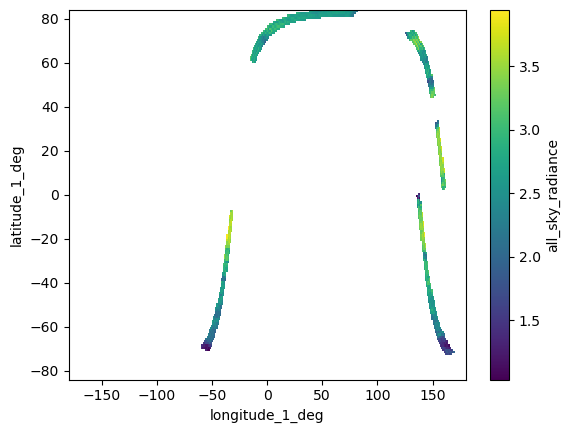

In [21]:
test_ds["all_sky_radiance"].plot()

# 2x2 degree gridcells